<a href="https://colab.research.google.com/github/angelo-leone/angelo-leone.GitHub.io/blob/main/full-simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrated Simulation

Putting the pieces together, we can now run a simulation of the entire system.

**@Angelo, please make every necessary assumption as needed. Don't hesitate to ask if you have doubts and don't let yourself get stuck for too long.** For example, if it says to make a random draw and the distribution is not specified, assume a reasonable distribution a write down why you made that assumption. Similar thing, if the necessary parameters are not specified, assume the lowest number of parameters and write down their Meaning/Economic Interpretation.

Use the other notebook a reference and copy as much as you want.


The simulation will consist of the following steps:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
from scipy.optimize import fsolve, least_squares # least_squares might be used for initial guesses or single FOC if needed

# Create a random of draw $N_x$ of sellers with $C_x \sim F_x$

$F_x$ Is an exponential distribution with certain parameters to be defined.

--- Simulating Step 1: Generating Exporter Costs ---
Number of Exporters (N_x): 1000
Assumed Scale Parameter (mean C_x) for F_x: 2.0

First 10 generated exporter costs (C_x):
[0.93853618 6.02024286 2.63349139 1.82588511 0.33924974 0.33919258
 0.11967754 4.02246173 1.83816431 2.46250012]

Summary statistics for generated C_x:
  Mean: 1.9450 (should be close to beta_cx: 2.0)
  Min:  0.0093
  Max:  16.3449
  Std:  1.9440 (for exponential, std should be close to mean)


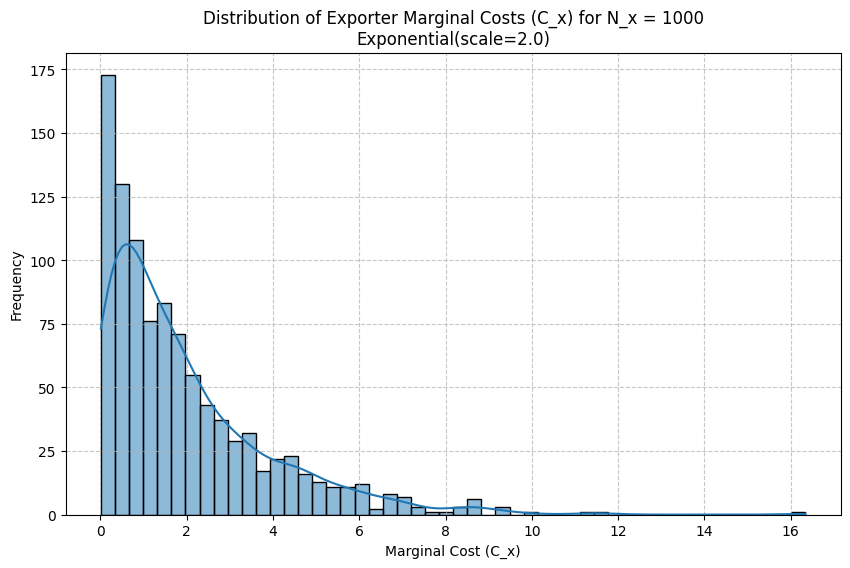


--- End of Step 1 Demonstration ---


In [2]:
# --- Step 1: Generate Exporter Costs ---

def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    """
    Generates a random draw of marginal costs (C_x) for N_x sellers (exporters)
    from an exponential distribution F_x.

    Parameters:
    ----------
    num_exporters : int
        The number of exporters (N_x) to generate.
    scale_parameter_cx : float
        The scale parameter (beta = 1/lambda) for the exponential distribution F_x.
        This is also the mean of the distribution for C_x.
        A lower C_x implies higher productivity.
    random_seed : int, optional
        Seed for the random number generator for reproducibility. Default is None.

    Returns:
    -------
    numpy.ndarray
        An array of a_x_values representing the marginal costs for each exporter.
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # C_x represents the marginal cost of exporters.
    # F_x is an exponential distribution.
    # numpy.random.exponential takes the scale parameter (beta), which is the mean.
    exporter_costs = np.random.exponential(scale=scale_parameter_cx, size=num_exporters)

    return exporter_costs

# --- Testing and Demonstration of Step 1 ---

if __name__ == '__main__':
    # Define parameters for the simulation step
    N_x = 1000  # Number of exporters

    # Economic Interpretation of scale_parameter_cx:
    # This parameter represents the average marginal cost of production for exporters.
    # A higher value means, on average, exporters are less productive (higher costs).
    # An exponential distribution implies many firms with costs lower than the average,
    # and a tail of firms with higher costs.
    beta_cx = 2.0  # Assumed average marginal cost for exporters

    print(f"--- Simulating Step 1: Generating Exporter Costs ---")
    print(f"Number of Exporters (N_x): {N_x}")
    print(f"Assumed Scale Parameter (mean C_x) for F_x: {beta_cx}\n")

    # Generate exporter costs
    C_x_values = generate_exporter_costs(num_exporters=N_x,
                                         scale_parameter_cx=beta_cx,
                                         random_seed=42)

    # Display some of the generated costs
    print(f"First 10 generated exporter costs (C_x):")
    print(C_x_values[:10])
    print(f"\nSummary statistics for generated C_x:")
    print(f"  Mean: {np.mean(C_x_values):.4f} (should be close to beta_cx: {beta_cx})")
    print(f"  Min:  {np.min(C_x_values):.4f}")
    print(f"  Max:  {np.max(C_x_values):.4f}")
    print(f"  Std:  {np.std(C_x_values):.4f} (for exponential, std should be close to mean)")

    # --- Visualization (Optional, but good for insights) ---
    # This helps to understand the distribution of generated costs.
    plt.figure(figsize=(10, 6))
    sns.histplot(C_x_values, kde=True, bins=50)
    plt.title(f'Distribution of Exporter Marginal Costs (C_x) for N_x = {N_x}\nExponential(scale={beta_cx})')
    plt.xlabel('Marginal Cost (C_x)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print("\n--- End of Step 1 Demonstration ---")

# Create a set of $N_y$ buyers and randomly assign them to sellers.

The assignment of buyers to sellers is done randomly. For each buyer, we make a random draw of the number of sellers they are assigned to. Then, we randomly select who those sellers are. The number of sellers is drawn from a Poisson distribution.



--- Simulating Step 2: Creating Buyers and Initial Links ---
Number of Buyers (N_y): 500
Number of Sellers (N_x): 1000
Assumed Lambda for Poisson (avg sellers per buyer): 5.0

Initial links for the first 5 buyers (buyer_idx: [seller_indices]):
  Buyer 0: [np.int64(50), np.int64(937), np.int64(944), np.int64(85), np.int64(131), np.int64(954), np.int64(662)]
  Buyer 1: [np.int64(229), np.int64(722), np.int64(885), np.int64(248), np.int64(365)]
  Buyer 2: [np.int64(926), np.int64(380), np.int64(526), np.int64(553)]
  Buyer 3: [np.int64(162), np.int64(329), np.int64(298), np.int64(755), np.int64(386), np.int64(197), np.int64(112), np.int64(802)]
  Buyer 4: [np.int64(422), np.int64(611), np.int64(588), np.int64(773), np.int64(916), np.int64(15)]

Summary statistics for the number of sellers per buyer:
  Mean:   4.8560 (should be close to lambda: 5.0)
  Min:    0.0000
  Max:    13.0000
  Std:    2.4330 (for Poisson, std is sqrt(lambda))


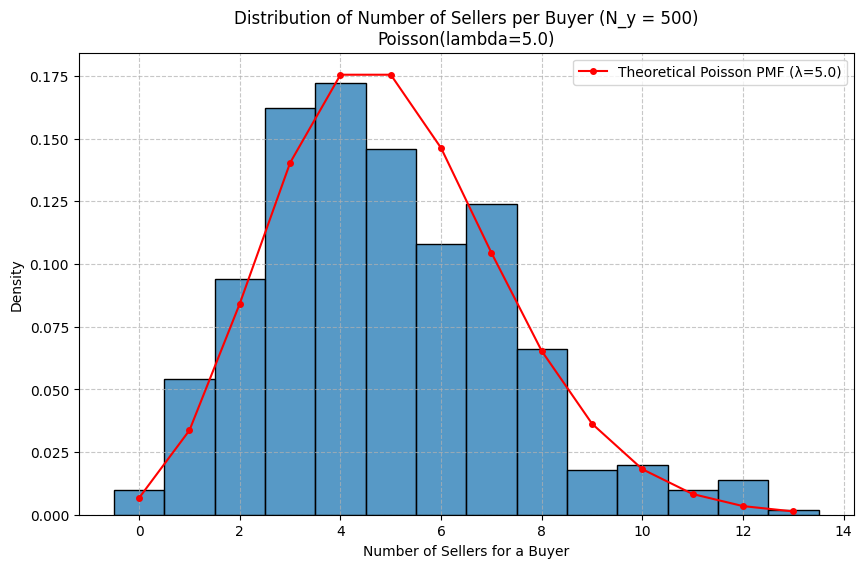


Summary statistics for the number of buyers per seller (initial network):
  Mean:   2.4280
  Min:    0.0000
  Max:    9.0000
  Std:    1.5208


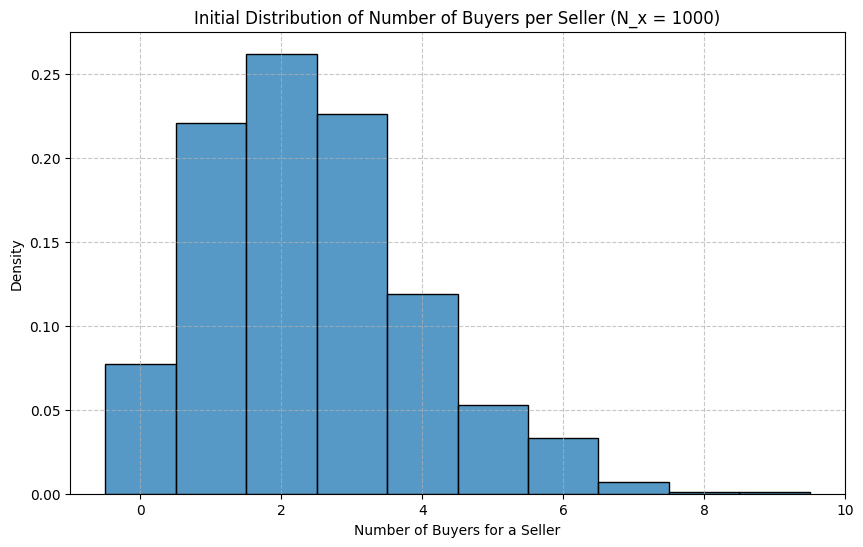


--- End of Step 2 Demonstration ---


In [3]:
# --- (Assuming Step 1 code is available or re-run) ---
# This is needed to know N_x (number of sellers)
def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    exporter_costs = np.random.exponential(scale=scale_parameter_cx, size=num_exporters)
    return exporter_costs

# --- Step 2: Create Buyers and Assign Initial Random Links ---

def create_initial_buyer_seller_links(num_buyers, num_sellers, lambda_poisson_links, random_seed=None):
    """
    Creates a set of N_y buyers and randomly assigns them to N_x sellers.
    The number of sellers for each buyer is drawn from a Poisson distribution.
    The specific sellers are chosen randomly.

    Parameters:
    ----------
    num_buyers : int
        The number of buyers (N_y) to create.
    num_sellers : int
        The total number of available sellers (N_x).
    lambda_poisson_links : float
        The average number of sellers (lambda) for the Poisson distribution,
        determining how many sellers each buyer is connected to.
    random_seed : int, optional
        Seed for the random number generator for reproducibility. Default is None.

    Returns:
    -------
    list of lists
        A list where each inner list contains the indices of sellers
        connected to the buyer at the corresponding outer list index.
        Example: initial_links[i] = [seller_idx1, seller_idx2, ...] for buyer i.
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    initial_links_buyer_to_seller = []
    seller_indices = np.arange(num_sellers) # Array of possible seller indices [0, 1, ..., N_x-1]

    for buyer_idx in range(num_buyers):
        # 1. Draw the number of sellers for this buyer from a Poisson distribution
        num_sellers_for_buyer = np.random.poisson(lam=lambda_poisson_links)

        # 2. Cap the number of sellers at N_x (cannot have more sellers than available)
        if num_sellers_for_buyer > num_sellers:
            num_sellers_for_buyer = num_sellers

        # 3. Randomly select 'num_sellers_for_buyer' unique sellers
        # np.random.choice without replacement ensures unique sellers
        if num_sellers_for_buyer > 0:
            assigned_sellers = np.random.choice(seller_indices, size=num_sellers_for_buyer, replace=False)
            initial_links_buyer_to_seller.append(list(assigned_sellers))
        else:
            initial_links_buyer_to_seller.append([]) # Buyer might have 0 initial sellers

    return initial_links_buyer_to_seller

# --- Testing and Demonstration of Step 2 ---

if __name__ == '__main__':
    # Parameters from Step 1 (or re-define for standalone testing)
    N_x = 1000  # Number of exporters (sellers)
    beta_cx = 2.0
    C_x_values = generate_exporter_costs(N_x, beta_cx, random_seed=42) # Needed for N_x

    # Define parameters for Step 2
    N_y = 500   # Number of importers (buyers)

    # Economic Interpretation of lambda_poisson_links:
    # This parameter determines the initial average density of the buyer-seller network.
    # A higher lambda means buyers, on average, start with more suppliers, leading to
    # potentially more competition among sellers for each buyer and different initial
    # bargaining positions.
    avg_sellers_per_buyer = 5.0 # Assumed average number of sellers per buyer (lambda for Poisson)

    print(f"\n--- Simulating Step 2: Creating Buyers and Initial Links ---")
    print(f"Number of Buyers (N_y): {N_y}")
    print(f"Number of Sellers (N_x): {N_x}")
    print(f"Assumed Lambda for Poisson (avg sellers per buyer): {avg_sellers_per_buyer}\n")

    # Generate initial links
    initial_links = create_initial_buyer_seller_links(num_buyers=N_y,
                                                      num_sellers=N_x,
                                                      lambda_poisson_links=avg_sellers_per_buyer,
                                                      random_seed=123)

    # Display some of the generated links
    print(f"Initial links for the first 5 buyers (buyer_idx: [seller_indices]):")
    for i in range(min(5, N_y)):
        print(f"  Buyer {i}: {initial_links[i]}")

    # --- Further Insights & Verification (Optional) ---
    # Calculate the distribution of the number of sellers per buyer
    num_sellers_distribution = [len(sellers) for sellers in initial_links]

    print(f"\nSummary statistics for the number of sellers per buyer:")
    print(f"  Mean:   {np.mean(num_sellers_distribution):.4f} (should be close to lambda: {avg_sellers_per_buyer})")
    print(f"  Min:    {np.min(num_sellers_distribution):.4f}")
    print(f"  Max:    {np.max(num_sellers_distribution):.4f}")
    print(f"  Std:    {np.std(num_sellers_distribution):.4f} (for Poisson, std is sqrt(lambda))")

    plt.figure(figsize=(10, 6))
    sns.histplot(num_sellers_distribution, discrete=True, stat="density", kde=False)
    plt.title(f'Distribution of Number of Sellers per Buyer (N_y = {N_y})\nPoisson(lambda={avg_sellers_per_buyer})')
    plt.xlabel('Number of Sellers for a Buyer')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Overlay theoretical Poisson PMF for comparison
    from scipy.stats import poisson
    x_poisson = np.arange(0, np.max(num_sellers_distribution) + 1)
    pmf_poisson = poisson.pmf(x_poisson, avg_sellers_per_buyer)
    plt.plot(x_poisson, pmf_poisson, 'ro-', ms=4, label=f'Theoretical Poisson PMF (λ={avg_sellers_per_buyer})')
    plt.legend()
    plt.show()

    # Also, it might be useful to see the seller-side perspective:
    # How many buyers is each seller connected to initially?
    # This requires inverting the links
    initial_links_seller_to_buyer = [[] for _ in range(N_x)]
    for buyer_idx, seller_list in enumerate(initial_links):
        for seller_idx in seller_list:
            initial_links_seller_to_buyer[seller_idx].append(buyer_idx)

    num_buyers_distribution_for_sellers = [len(buyers) for buyers in initial_links_seller_to_buyer]

    print(f"\nSummary statistics for the number of buyers per seller (initial network):")
    print(f"  Mean:   {np.mean(num_buyers_distribution_for_sellers):.4f}")
    print(f"  Min:    {np.min(num_buyers_distribution_for_sellers):.4f}")
    print(f"  Max:    {np.max(num_buyers_distribution_for_sellers):.4f}")
    print(f"  Std:    {np.std(num_buyers_distribution_for_sellers):.4f}")

    plt.figure(figsize=(10, 6))
    sns.histplot(num_buyers_distribution_for_sellers, discrete=True, stat="density", kde=False)
    plt.title(f'Initial Distribution of Number of Buyers per Seller (N_x = {N_x})')
    plt.xlabel('Number of Buyers for a Seller')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print("\n--- End of Step 2 Demonstration ---")

# Get a system of equations from each seller-buyer pair.

You ahould be able to write down a solvable system of equations for each buyer from the barganining first-order-conditions(FOC) of the buyer with all the sellers they are assigned to.



In [5]:
# --- (Assuming Step 1 and Step 2 code is available or re-run) ---
def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    exporter_costs = np.random.exponential(scale=scale_parameter_cx, size=num_exporters)
    return exporter_costs

def create_initial_buyer_seller_links(num_buyers, num_sellers, lambda_poisson_links, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    initial_links_buyer_to_seller = []
    seller_indices = np.arange(num_sellers)
    for buyer_idx in range(num_buyers):
        num_sellers_for_buyer = np.random.poisson(lam=lambda_poisson_links)
        if num_sellers_for_buyer > num_sellers:
            num_sellers_for_buyer = num_sellers
        if num_sellers_for_buyer > 0:
            assigned_sellers = np.random.choice(seller_indices, size=num_sellers_for_buyer, replace=False)
            initial_links_buyer_to_seller.append(list(assigned_sellers))
        else:
            initial_links_buyer_to_seller.append([])
    return initial_links_buyer_to_seller

# --- Parameters from simulation-pieces.ipynb ---
# These are model-wide parameters
sigma_param = 4.5  # Demand elasticity (sigma in PDF)
eta_param = 1.5    # Substitution elasticity in production for buyer (eta in PDF)
theta_param = 0.7  # Seller's bargaining power (theta in PDF)

# --- Lambdify the FOC from Equation (16) of the PDF ---
# This is adapted from your simulation-pieces.ipynb
# Symbolic variables
P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym = sym.symbols(
    'P_xy C_y C_x sigma theta eta'
)

# Equation (16) from the PDF (Boncompte, Perello 2024.pdf)
# Note: The notebook calls it Eq 18, but it matches Eq 16 in the PDF.
FOC_lhs = 1 / (1 - x_sym / P_sym)
FOC_rhs_term1_factor = (sigma_sym - 1) * ((1 - theta_sym) / theta_sym)
FOC_rhs_term1_denom_inner_base = (1 - (P_sym / y_sym)**(eta_sym - 1))
FOC_rhs_term1_denom_inner_power = (sigma_sym - 1) / (eta_sym - 1)
FOC_rhs_term1_denom = (1 - FOC_rhs_term1_denom_inner_base**FOC_rhs_term1_denom_inner_power)
FOC_rhs_term1 = eta_sym + FOC_rhs_term1_factor * (1 / FOC_rhs_term1_denom) * (P_sym / y_sym)**(-(eta_sym - 1))
FOC_rhs_term2 = (sigma_sym - eta_sym) * (P_sym / y_sym)
FOC_rhs = FOC_rhs_term1 + FOC_rhs_term2

FOC_equation_residual = FOC_lhs - FOC_rhs

# Lambdify the function for numerical computation
# Order of arguments for lambdify: P_xy, C_y_minus_x, C_x, sigma, theta, eta
# P_xy is the variable we solve for in a single FOC.
# C_y_minus_x is y_sym (buyer's cost index from other suppliers).
# C_x is x_sym (seller's marginal cost).
foc_bargaining_residual_func = sym.lambdify(
    (P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym),
    FOC_equation_residual,
    modules='numpy'
)

# --- Step 3: Solve Bargaining System for Each Buyer ---

def solve_buyer_bargaining_system(
    buyer_idx,
    sellers_for_this_buyer, # list of seller indices
    all_seller_costs,       # C_x_values (numpy array)
    sigma, eta, theta       # model parameters
    ):
    """
    Solves the Nash-in-Nash bargaining system for a single buyer.
    Returns a dictionary of {seller_idx: price}.
    """
    k = len(sellers_for_this_buyer)
    solved_prices_for_buyer = {}

    if k == 0:
        return solved_prices_for_buyer # No sellers, no prices

    # Case 1: Buyer has only one seller (bilateral monopoly)
    if k == 1:
        seller_idx = sellers_for_this_buyer[0]
        c_x = all_seller_costs[seller_idx]

        # Price formula for bilateral monopoly derived from Nash bargaining:
        # P_xy = C_x * ( (sigma + theta - 1) / (sigma - 1) )
        if (sigma - 1) == 0: # Avoid division by zero
             # This case implies infinite markup, should be handled based on model limits
            # Or indicates parameters are outside typical economic range.
            # For now, let's assume sigma > 1 from parameters.
            price_xy = c_x * 1e9 # A very large markup, placeholder
        else:
            price_xy = c_x * ((sigma + theta - 1) / (sigma - 1))

        # Ensure price is at least the marginal cost (it should be if params are valid)
        price_xy = max(price_xy, c_x * (1 + 1e-6)) # Ensure P_xy > C_x for FOC
        solved_prices_for_buyer[seller_idx] = price_xy
        return solved_prices_for_buyer

    # Case 2: Buyer has k > 1 sellers. Solve system of k FOCs.
    seller_costs_for_this_buyer = np.array([all_seller_costs[s_idx] for s_idx in sellers_for_this_buyer])

    def system_residuals(p_vector_guesses):
        """
        p_vector_guesses: numpy array of current price guesses [P_x1y, P_x2y, ..., P_xky]
        Returns a numpy array of k residuals, one for each FOC.
        """
        residuals = np.empty(k)
        for i in range(k):
            p_xiy = p_vector_guesses[i]
            c_xi = seller_costs_for_this_buyer[i]

            # Calculate C_y_minus_xi (buyer's cost index from other k-1 sellers)
            sum_other_prices_term = 0
            num_other_sellers = 0
            for j in range(k):
                if i == j:
                    continue
                # Ensure p_vector_guesses[j] is positive to avoid issues with power
                p_xjy = max(p_vector_guesses[j], 1e-9) # Small positive floor
                sum_other_prices_term += p_xjy**(1 - eta)
                num_other_sellers += 1

            if num_other_sellers == 0: # Should not happen if k > 1
                # This would imply C_y_minus_xi is infinite, FOC is ill-defined
                # This case is essentially k=1, which is handled separately.
                # However, if fsolve explores regions where other prices are ~0, this might be an issue.
                # For safety, if this occurs, return a large residual.
                residuals[i] = 1e9
                continue

            # Handle potential negative sum_other_prices_term if 1-eta is tricky, though prices should be positive
            if sum_other_prices_term <= 0: # Should not happen with positive prices and typical eta
                 c_y_minus_xi = 1e9 # Effectively infinite if sum is non-positive
            else:
                 c_y_minus_xi = sum_other_prices_term**(1 / (1 - eta))

            # Ensure C_y_minus_xi is positive for FOC calculations
            c_y_minus_xi = max(c_y_minus_xi, 1e-9)


            # Ensure P_xiy > C_xi for the FOC's 1/(1 - C_x/P_xy) term
            # fsolve might try P_xiy <= C_xi. We can add a penalty or use a bounded solver if this is an issue.
            # For now, we rely on fsolve finding a valid region.
            # A small epsilon to prevent P_xiy == c_xi exactly during iteration.
            p_xiy_eval = max(p_xiy, c_xi * (1 + 1e-7))


            try:
                residuals[i] = foc_bargaining_residual_func(
                    p_xiy_eval, c_y_minus_xi, c_xi, sigma, theta, eta
                )
            except ZeroDivisionError:
                # This can happen if (1 - (1 - (P_xy/C_y)^(eta-1))^((sigma-1)/(eta-1))) becomes 0
                # Or if P_xiy_eval is too close to c_xi
                residuals[i] = np.sign(p_xiy_eval - c_xi) * 1e9 # Large residual, sign helps fsolve
            except ValueError: # e.g. math domain error for power of negative number
                residuals[i] = 1e9


        return residuals

    # Initial guesses for prices (P_xiy slightly above C_xi)
    initial_price_guesses = seller_costs_for_this_buyer * 1.1
    # Ensure initial guesses are strictly greater than costs
    for i in range(k):
        initial_price_guesses[i] = max(initial_price_guesses[i], seller_costs_for_this_buyer[i] * (1 + 1e-6))


    try:
        solved_p_vector, infodict, ier, mesg = fsolve(system_residuals, initial_price_guesses, full_output=True, xtol=1e-7)
        if ier != 1: # ier=1 means solution converged
            # print(f"Warning: Bargaining system for buyer {buyer_idx} (k={k} sellers) did not converge. Message: {mesg}")
            # print(f"  Initial guesses: {initial_price_guesses}")
            # print(f"  Final P_vector: {solved_p_vector}")
            # print(f"  Final residuals: {infodict['fvec']}")
            # Fallback or error handling: for now, use initial guesses or slightly marked up costs
            # This might indicate issues with parameter choices or extreme cost disparities.
            # For robustness, one might try other solvers or initial guess strategies.
            # Using slightly marked-up costs as a simple fallback if fsolve fails badly
            for i in range(k):
                 solved_prices_for_buyer[sellers_for_this_buyer[i]] = max(seller_costs_for_this_buyer[i] * 1.05, 1e-6) # Ensure positive
            return solved_prices_for_buyer # Return marked-up costs as fallback

    except Exception as e:
        # print(f"Error solving system for buyer {buyer_idx} (k={k}): {e}")
        # Fallback for unexpected errors
        for i in range(k):
            solved_prices_for_buyer[sellers_for_this_buyer[i]] = max(seller_costs_for_this_buyer[i] * 1.05, 1e-6)
        return solved_prices_for_buyer


    for i in range(k):
        # Ensure prices are economically sensible (P_xy >= C_x)
        # fsolve might return P < C_x if residuals are small but not zero.
        # We should enforce P_xy > C_x. If not, it's a sign of trouble or parameter issues.
        price = max(solved_p_vector[i], seller_costs_for_this_buyer[i] * (1 + 1e-6)) # Ensure positive markup
        solved_prices_for_buyer[sellers_for_this_buyer[i]] = price

    return solved_prices_for_buyer


def solve_all_buyer_systems(
    num_buyers,
    all_seller_costs, # C_x_values
    links_buyer_to_seller,
    sigma, eta, theta
    ):
    """
    Solves the bargaining system for all buyers.
    """
    all_bilateral_prices = [] # List of dicts, one per buyer

    num_convergence_failures = 0
    num_errors_in_solve = 0

    for buyer_idx in range(num_buyers):
        sellers_for_this_buyer = links_buyer_to_seller[buyer_idx]

        # Temporarily suppress runtime warnings from within fsolve/lambdify for cleaner output during loop
        with np.errstate(divide='ignore', invalid='ignore'):
            prices_dict = solve_buyer_bargaining_system(
                buyer_idx,
                sellers_for_this_buyer,
                all_seller_costs,
                sigma, eta, theta
            )
        all_bilateral_prices.append(prices_dict)

        # Basic check for convergence issues (can be made more sophisticated)
        # This check is now internal to solve_buyer_bargaining_system,
        # but we might want aggregate stats here.
        # For this example, we assume solve_buyer_bargaining_system handles its own warnings/fallbacks.

    # print(f"Finished solving for all buyers.")
    # if num_convergence_failures > 0:
    #     print(f"Total convergence failures: {num_convergence_failures}/{num_buyers}")
    # if num_errors_in_solve > 0:
    #      print(f"Total errors during solve: {num_errors_in_solve}/{num_buyers}")

    return all_bilateral_prices

# Get the bilateral prices from solving the system of equations.


--- Simulating Step 3: Solving Bargaining Systems for Each Buyer ---
Using parameters: sigma=4.5, eta=1.5, theta=0.7
Solving bargaining systems (this may take a moment for many buyers/sellers)...
Done solving.

Solved bilateral prices P_xy for the first 5 buyers:
  Buyer 0 (connected to sellers [np.int64(37), np.int64(26)]):
    - Seller 37 (C_x=0.21): Price P_xy = 0.255 (Markup: 24.2%)
    - Seller 26 (C_x=0.45): Price P_xy = 0.505 (Markup: 13.3%)
  Buyer 1 (connected to sellers [np.int64(30), np.int64(36), np.int64(31)]):
    - Seller 30 (C_x=1.87): Price P_xy = 1.917 (Markup: 2.5%)
    - Seller 36 (C_x=0.73): Price P_xy = 0.784 (Markup: 7.9%)
    - Seller 31 (C_x=0.37): Price P_xy = 0.434 (Markup: 16.1%)
  Buyer 2 (connected to sellers [np.int64(0), np.int64(42), np.int64(11)]):
    - Seller 0 (C_x=0.94): Price P_xy = 0.961 (Markup: 2.4%)
    - Seller 42 (C_x=0.07): Price P_xy = 0.085 (Markup: 20.9%)
    - Seller 11 (C_x=7.01): Price P_xy = 7.024 (Markup: 0.2%)
  Buyer 3 (connected

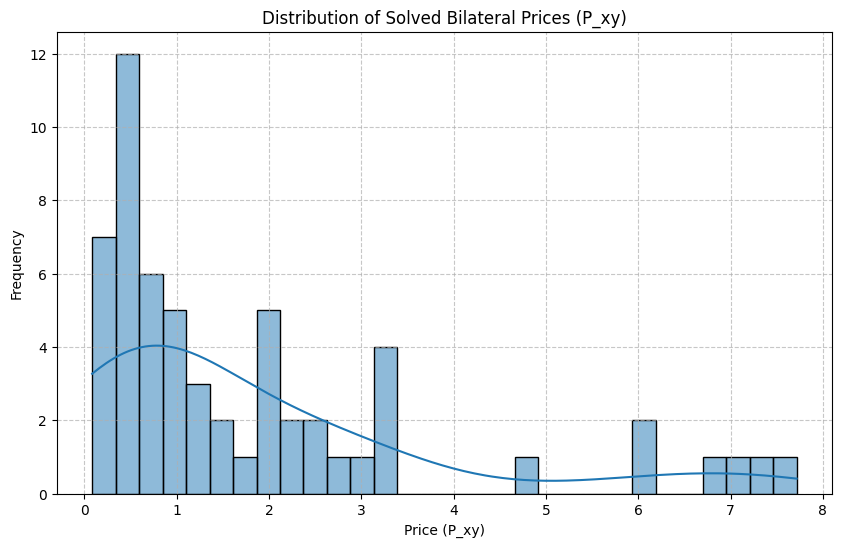


--- End of Step 3 Demonstration ---


In [6]:
# --- Testing and Demonstration of Step 3 ---
if __name__ == '__main__':
    # Parameters from Step 1 & 2
    N_x = 50  # Number of exporters (sellers) - smaller for faster testing
    beta_cx = 2.0
    C_x_values = generate_exporter_costs(N_x, beta_cx, random_seed=42)

    N_y = 20   # Number of importers (buyers) - smaller for faster testing
    avg_sellers_per_buyer = 3.0 # Poisson lambda

    initial_links = create_initial_buyer_seller_links(
        num_buyers=N_y,
        num_sellers=N_x,
        lambda_poisson_links=avg_sellers_per_buyer,
        random_seed=123
    )

    print(f"\n--- Simulating Step 3: Solving Bargaining Systems for Each Buyer ---")
    print(f"Using parameters: sigma={sigma_param}, eta={eta_param}, theta={theta_param}")

    # Solve for all buyers
    # Adding a simple convergence check for the demo
    print("Solving bargaining systems (this may take a moment for many buyers/sellers)...")

    # To see warnings from fsolve if they occur during the main run:
    # import warnings
    # warnings.filterwarnings("error", category=RuntimeWarning) # Makes RuntimeWarnings into exceptions

    solved_prices_all_buyers = solve_all_buyer_systems(
        N_y, C_x_values, initial_links, sigma_param, eta_param, theta_param
    )
    print("Done solving.")

    # Display solved prices for the first few buyers
    print(f"\nSolved bilateral prices P_xy for the first {min(5, N_y)} buyers:")
    for i in range(min(5, N_y)):
        print(f"  Buyer {i} (connected to sellers {initial_links[i]}):")
        if not solved_prices_all_buyers[i]:
            print("    No sellers for this buyer.")
        else:
            for seller_idx, price in solved_prices_all_buyers[i].items():
                seller_cost = C_x_values[seller_idx]
                markup = (price - seller_cost) / seller_cost * 100 if seller_cost > 0 else float('inf')
                print(f"    - Seller {seller_idx} (C_x={seller_cost:.2f}): Price P_xy = {price:.3f} (Markup: {markup:.1f}%)")

    # --- Further Insights (Optional) ---
    all_prices_flat = [p for D in solved_prices_all_buyers for p in D.values()]
    if all_prices_flat:
        plt.figure(figsize=(10, 6))
        sns.histplot(all_prices_flat, kde=True, bins=30)
        plt.title('Distribution of Solved Bilateral Prices (P_xy)')
        plt.xlabel('Price (P_xy)')
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("\nNo links were formed, so no prices to plot.")

    print("\n--- End of Step 3 Demonstration ---")

# Compute the buyers' aggregated cost index (CES) and the empirical distribution of buyers' productivity $C_y\sim F_y$.

Solving bargaining systems for Step 4 demo (this may be quick)...
Done solving bargaining systems.

--- Simulating Step 4: Computing Buyer Cost Indices (C_y) ---
Using substitution elasticity eta = 1.5

Computed C_y for the first 10 buyers:
  Buyer 0 (has 2 sellers): C_y = 0.087
  Buyer 1 (has 3 sellers): C_y = 0.088
  Buyer 2 (has 3 sellers): C_y = 0.043
  Buyer 3 (has 2 sellers): C_y = 0.518
  Buyer 4 (has 2 sellers): C_y = 0.335
  Buyer 5 (has 1 sellers): C_y = 0.872
  Buyer 6 (has 0 sellers): C_y = inf
  Buyer 7 (has 2 sellers): C_y = 1.067
  Buyer 8 (has 4 sellers): C_y = 0.013
  Buyer 9 (has 1 sellers): C_y = 2.607

Summary statistics for finite C_y values (Empirical F_y):
  Number of buyers with finite C_y: 18/20
  Mean C_y:   0.4918
  Min C_y:    0.0110
  Max C_y:    2.6070
  Std C_y:    0.8032


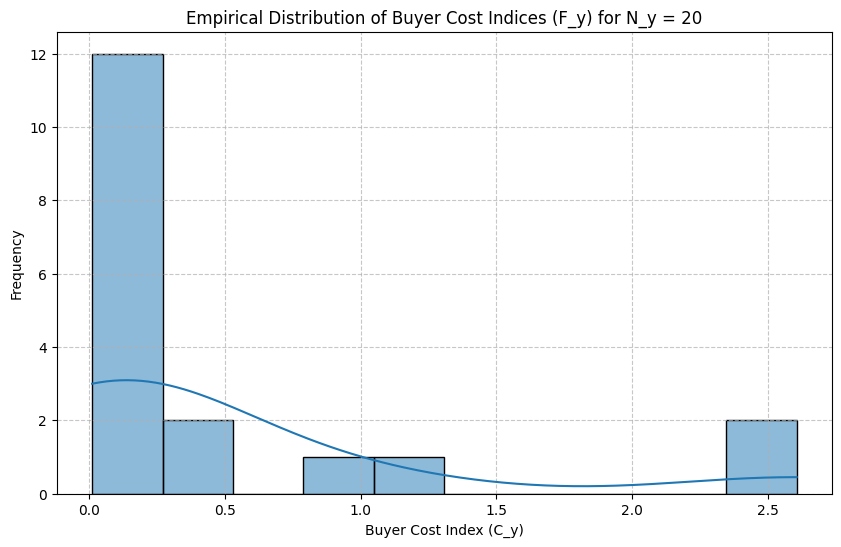


Number of buyers with C_y = inf (no sellers): 2

--- End of Step 4 Demonstration ---


In [7]:
# --- (Assuming Step 1, 2, 3 code is available or re-run) ---
# Step 1: Generate Exporter Costs
def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    return np.random.exponential(scale=scale_parameter_cx, size=num_exporters)

# Step 2: Create Initial Buyer-Seller Links
def create_initial_buyer_seller_links(num_buyers, num_sellers, lambda_poisson_links, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    initial_links_buyer_to_seller = []
    seller_indices = np.arange(num_sellers)
    for _ in range(num_buyers):
        num_sellers_for_buyer = np.random.poisson(lam=lambda_poisson_links)
        num_sellers_for_buyer = min(num_sellers_for_buyer, num_sellers)
        if num_sellers_for_buyer > 0:
            initial_links_buyer_to_seller.append(list(np.random.choice(seller_indices, size=num_sellers_for_buyer, replace=False)))
        else:
            initial_links_buyer_to_seller.append([])
    return initial_links_buyer_to_seller

# --- Parameters from simulation-pieces.ipynb ---
sigma_param = 4.5
eta_param = 1.5 # Crucial for this step
theta_param = 0.7

# --- Lambdified FOC from Step 3 ---
P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym = sym.symbols('P_xy C_y C_x sigma theta eta')
FOC_lhs = 1 / (1 - x_sym / P_sym)
FOC_rhs_term1_factor = (sigma_sym - 1) * ((1 - theta_sym) / theta_sym)
FOC_rhs_term1_denom_inner_base = (1 - (P_sym / y_sym)**(eta_sym - 1))
FOC_rhs_term1_denom_inner_power = (sigma_sym - 1) / (eta_sym - 1)
FOC_rhs_term1_denom = (1 - FOC_rhs_term1_denom_inner_base**FOC_rhs_term1_denom_inner_power)
FOC_rhs_term1 = eta_sym + FOC_rhs_term1_factor * (1 / FOC_rhs_term1_denom) * (P_sym / y_sym)**(-(eta_sym - 1))
FOC_rhs_term2 = (sigma_sym - eta_sym) * (P_sym / y_sym)
FOC_rhs = FOC_rhs_term1 + FOC_rhs_term2
FOC_equation_residual = FOC_lhs - FOC_rhs
foc_bargaining_residual_func = sym.lambdify(
    (P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym),
    FOC_equation_residual,
    modules='numpy'
)

# Step 3: Solve Bargaining System (simplified for brevity, assuming it's available)
def solve_buyer_bargaining_system(buyer_idx, sellers_for_this_buyer, all_seller_costs, sigma, eta, theta):
    k = len(sellers_for_this_buyer)
    solved_prices_for_buyer = {}
    if k == 0: return solved_prices_for_buyer
    seller_costs_for_this_buyer = np.array([all_seller_costs[s_idx] for s_idx in sellers_for_this_buyer])
    if k == 1:
        c_x = seller_costs_for_this_buyer[0]
        price_xy = c_x * ((sigma + theta - 1) / (sigma - 1)) if (sigma - 1) != 0 else c_x * 1e9
        solved_prices_for_buyer[sellers_for_this_buyer[0]] = max(price_xy, c_x * (1 + 1e-6))
        return solved_prices_for_buyer

    def system_residuals(p_vector_guesses):
        residuals = np.empty(k)
        for i in range(k):
            p_xiy = p_vector_guesses[i]
            c_xi = seller_costs_for_this_buyer[i]
            sum_other_prices_term = 0
            num_other_sellers = 0
            for j in range(k):
                if i == j: continue
                p_xjy = max(p_vector_guesses[j], 1e-9)
                sum_other_prices_term += p_xjy**(1 - eta)
                num_other_sellers +=1
            if num_other_sellers == 0:
                residuals[i] = 1e9; continue
            c_y_minus_xi = sum_other_prices_term**(1 / (1 - eta)) if sum_other_prices_term > 0 else 1e9
            c_y_minus_xi = max(c_y_minus_xi, 1e-9)
            p_xiy_eval = max(p_xiy, c_xi * (1 + 1e-7))
            try:
                residuals[i] = foc_bargaining_residual_func(p_xiy_eval, c_y_minus_xi, c_xi, sigma, theta, eta)
            except (ZeroDivisionError, ValueError): residuals[i] = np.sign(p_xiy_eval - c_xi if c_xi !=0 else p_xiy_eval) * 1e9
        return residuals

    initial_price_guesses = np.maximum(seller_costs_for_this_buyer * 1.1, seller_costs_for_this_buyer * (1 + 1e-6))
    try:
        solved_p_vector, infodict, ier, mesg = fsolve(system_residuals, initial_price_guesses, full_output=True, xtol=1e-7)
        if ier != 1:
            for i in range(k): solved_prices_for_buyer[sellers_for_this_buyer[i]] = max(seller_costs_for_this_buyer[i] * 1.05, 1e-6)
            return solved_prices_for_buyer
    except Exception:
        for i in range(k): solved_prices_for_buyer[sellers_for_this_buyer[i]] = max(seller_costs_for_this_buyer[i] * 1.05, 1e-6)
        return solved_prices_for_buyer
    for i in range(k):
        solved_prices_for_buyer[sellers_for_this_buyer[i]] = max(solved_p_vector[i], seller_costs_for_this_buyer[i] * (1 + 1e-6))
    return solved_prices_for_buyer

def solve_all_buyer_systems(num_buyers, all_seller_costs, links_buyer_to_seller, sigma, eta, theta):
    all_bilateral_prices = []
    for buyer_idx in range(num_buyers):
        sellers_for_this_buyer = links_buyer_to_seller[buyer_idx]
        with np.errstate(divide='ignore', invalid='ignore'):
            prices_dict = solve_buyer_bargaining_system(buyer_idx, sellers_for_this_buyer, all_seller_costs, sigma, eta, theta)
        all_bilateral_prices.append(prices_dict)
    return all_bilateral_prices
# --- End of Step 3 Prerequisite ---


# --- Step 4: Compute Buyer's Aggregated Cost Index (C_y) ---

def compute_buyer_cost_indices(
    num_buyers,
    solved_bilateral_prices, # List of dicts from Step 3: [{seller_idx: price}, ...]
    eta # Substitution elasticity
    ):
    """
    Computes the aggregated CES cost index (C_y) for each buyer.

    Parameters:
    ----------
    num_buyers : int
        The number of buyers (N_y).
    solved_bilateral_prices : list of dicts
        A list where each dictionary contains {seller_idx: P_xy} for a buyer.
    eta : float
        The substitution elasticity in the buyer's production function.

    Returns:
    -------
    numpy.ndarray
        An array of C_y_values for each buyer.
        Buyers with no sellers will have C_y = np.inf.
    """
    C_y_values = np.empty(num_buyers)

    if (1 - eta) == 0:
        # This is the Cobb-Douglas case, CES formula needs adjustment (geometric mean)
        # For simplicity, the paper's CES form (Eq 5) assumes eta != 1.
        # If eta can be 1, this function would need a conditional branch.
        # Given eta_param = 1.5, this is not an issue here.
        print("Warning: eta = 1 implies Cobb-Douglas, CES formula used here is for eta != 1.")
        # Fallback to a very large cost if eta is exactly 1 for all.
        C_y_values[:] = np.inf
        return C_y_values

    for buyer_idx in range(num_buyers):
        prices_for_this_buyer_dict = solved_bilateral_prices[buyer_idx]

        if not prices_for_this_buyer_dict: # Buyer has no sellers
            C_y_values[buyer_idx] = np.inf
            continue

        sum_prices_term = 0
        for seller_idx, p_xy in prices_for_this_buyer_dict.items():
            # Ensure p_xy is positive for the power calculation
            p_xy_eval = max(p_xy, 1e-9) # Small positive floor
            sum_prices_term += p_xy_eval**(1 - eta)

        # The term (1-eta) can be negative if eta > 1.
        # If sum_prices_term is zero (e.g., all prices were floored to 0, unlikely) or negative (if prices could be negative)
        # this could lead to issues. Prices P_xy should be positive.
        if sum_prices_term <= 0: # Should only happen if all prices are effectively zero or eta is such that terms are negative
            C_y_values[buyer_idx] = np.inf # Or handle as an error/warning
        else:
            try:
                C_y_values[buyer_idx] = sum_prices_term**(1 / (1 - eta))
            except ZeroDivisionError: # Should be caught by (1-eta)==0 check, but for safety
                C_y_values[buyer_idx] = np.inf
            except ValueError: # e.g. negative base to a non-integer power
                 C_y_values[buyer_idx] = np.inf


    return C_y_values


# --- Testing and Demonstration of Step 4 ---
if __name__ == '__main__':
    # Parameters from previous steps
    N_x = 50
    beta_cx = 2.0
    C_x_values = generate_exporter_costs(N_x, beta_cx, random_seed=42)

    N_y = 20
    avg_sellers_per_buyer = 3.0
    initial_links = create_initial_buyer_seller_links(
        N_y, N_x, avg_sellers_per_buyer, random_seed=123
    )

    # Run Step 3 to get prices
    print("Solving bargaining systems for Step 4 demo (this may be quick)...")
    solved_prices_all_buyers = solve_all_buyer_systems(
        N_y, C_x_values, initial_links, sigma_param, eta_param, theta_param
    )
    print("Done solving bargaining systems.")

    print(f"\n--- Simulating Step 4: Computing Buyer Cost Indices (C_y) ---")
    print(f"Using substitution elasticity eta = {eta_param}")

    # Compute C_y values
    C_y_buyer_values = compute_buyer_cost_indices(
        N_y, solved_prices_all_buyers, eta_param
    )

    # Display C_y for the first few buyers
    print(f"\nComputed C_y for the first {min(10, N_y)} buyers:")
    for i in range(min(10, N_y)):
        num_sellers = len(initial_links[i])
        print(f"  Buyer {i} (has {num_sellers} sellers): C_y = {C_y_buyer_values[i]:.3f}")
        # You could also print the P_xy values that led to this C_y for verification
        # if solved_prices_all_buyers[i]:
        #     print(f"    Prices paid: {['{:.2f}'.format(p) for p in solved_prices_all_buyers[i].values()]}")


    # --- Empirical Distribution F_y ---
    # The array C_y_buyer_values *is* the empirical sample from F_y.
    # We can visualize it.

    # Filter out np.inf values for meaningful statistics and plotting
    C_y_finite_values = C_y_buyer_values[np.isfinite(C_y_buyer_values)]

    if C_y_finite_values.size > 0:
        print(f"\nSummary statistics for finite C_y values (Empirical F_y):")
        print(f"  Number of buyers with finite C_y: {C_y_finite_values.size}/{N_y}")
        print(f"  Mean C_y:   {np.mean(C_y_finite_values):.4f}")
        print(f"  Min C_y:    {np.min(C_y_finite_values):.4f}")
        print(f"  Max C_y:    {np.max(C_y_finite_values):.4f}")
        print(f"  Std C_y:    {np.std(C_y_finite_values):.4f}")

        plt.figure(figsize=(10, 6))
        sns.histplot(C_y_finite_values, kde=True, bins=max(10, min(N_y // 2, 30))) # Adjust bins
        plt.title(f'Empirical Distribution of Buyer Cost Indices (F_y) for N_y = {N_y}')
        plt.xlabel('Buyer Cost Index (C_y)')
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("\nNo buyers with finite C_y to plot (e.g., all buyers might have had 0 sellers).")

    num_buyers_no_sellers = N_y - C_y_finite_values.size
    if num_buyers_no_sellers > 0:
        print(f"\nNumber of buyers with C_y = inf (no sellers): {num_buyers_no_sellers}")


    print("\n--- End of Step 4 Demonstration ---")

# Get the sellers decision of search effort using $F_y$

Solving bargaining systems for Step 5 demo...
Done solving bargaining systems.
Computing buyer cost indices C_y...
Done computing C_y.

--- Simulating Step 5: Seller's Optimal Search Effort ---
Search params: kappa_0=0.5, phi_S=0.1
Upkeep param (seller): 0.01

Optimal search efforts for the first 10 sellers (epsilon*):
  Seller 0 (C_x=0.94, Num Current Buyers=0): Effort = 1.0645
  Seller 1 (C_x=6.02, Num Current Buyers=1): Effort = 0.0673
  Seller 2 (C_x=2.63, Num Current Buyers=3): Effort = 0.2380
  Seller 3 (C_x=1.83, Num Current Buyers=1): Effort = 0.4046
  Seller 4 (C_x=0.34, Num Current Buyers=3): Effort = 4.3061
  Seller 5 (C_x=0.34, Num Current Buyers=1): Effort = 4.3106
  Seller 6 (C_x=0.12, Num Current Buyers=0): Effort = 14.7349
  Seller 7 (C_x=4.02, Num Current Buyers=1): Effort = 0.1246
  Seller 8 (C_x=1.84, Num Current Buyers=0): Effort = 0.4025
  Seller 9 (C_x=2.46, Num Current Buyers=0): Effort = 0.2619


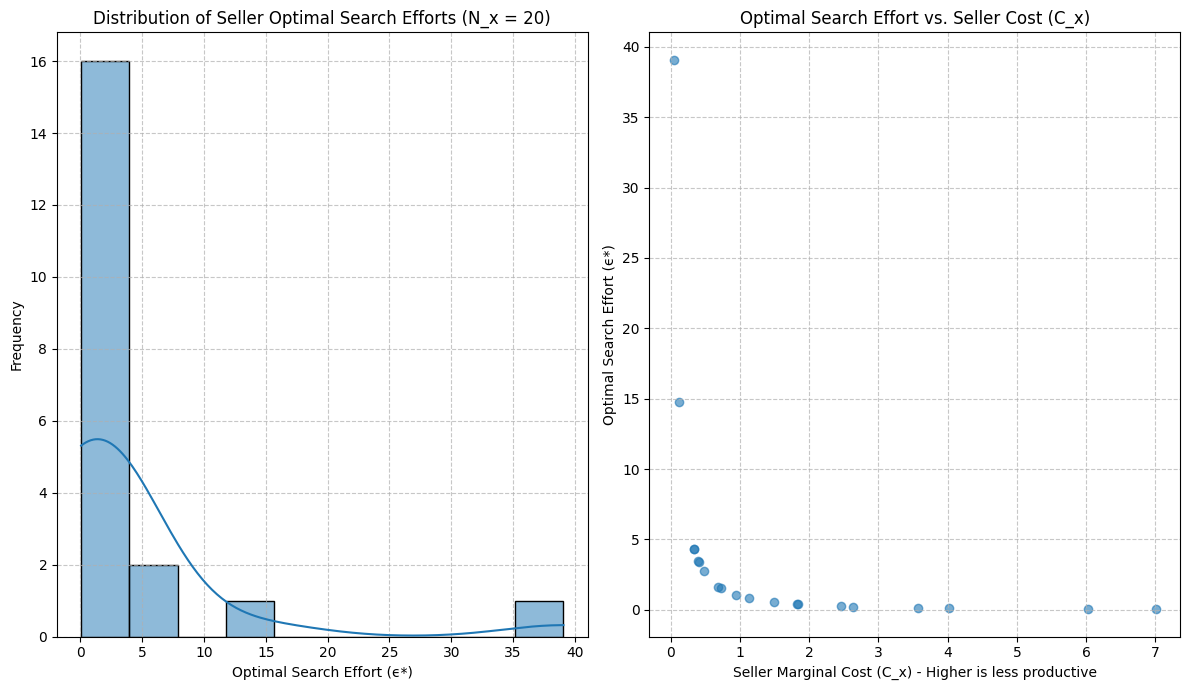


Summary statistics for optimal search efforts:
  Mean:   3.9660
  Min:    0.0549
  Max:    39.0720
  Std:    8.6744

--- End of Step 5 Demonstration ---


In [8]:
# --- (Assuming Steps 1-4 code is available or re-run) ---
# Step 1: Generate Exporter Costs
def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    if random_seed is not None: np.random.seed(random_seed)
    return np.random.exponential(scale=scale_parameter_cx, size=num_exporters)

# Step 2: Create Initial Buyer-Seller Links
def create_initial_buyer_seller_links(num_buyers, num_sellers, lambda_poisson_links, random_seed=None):
    if random_seed is not None: np.random.seed(random_seed)
    links = []
    s_indices = np.arange(num_sellers)
    for _ in range(num_buyers):
        n_sellers = min(np.random.poisson(lam=lambda_poisson_links), num_sellers)
        links.append(list(np.random.choice(s_indices, size=n_sellers, replace=False)) if n_sellers > 0 else [])
    return links

# --- Parameters ---
sigma_param = 4.5
eta_param = 1.5
theta_param = 0.7
P_market_param = 1.0 # Downstream market price index
E_market_param = 1.0 # Downstream market expenditure

# --- Lambdified FOC (from Step 3) ---
P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym = sym.symbols('P_xy C_y C_x sigma theta eta')
FOC_lhs = 1 / (1 - x_sym / P_sym); FOC_rhs_term1_factor = (sigma_sym - 1) * ((1 - theta_sym) / theta_sym)
FOC_rhs_term1_denom_inner_base = (1 - (P_sym / y_sym)**(eta_sym - 1)); FOC_rhs_term1_denom_inner_power = (sigma_sym - 1) / (eta_sym - 1)
FOC_rhs_term1_denom = (1 - FOC_rhs_term1_denom_inner_base**FOC_rhs_term1_denom_inner_power)
FOC_rhs_term1 = eta_sym + FOC_rhs_term1_factor * (1 / FOC_rhs_term1_denom) * (P_sym / y_sym)**(-(eta_sym - 1))
FOC_rhs_term2 = (sigma_sym - eta_sym) * (P_sym / y_sym); FOC_rhs = FOC_rhs_term1 + FOC_rhs_term2
FOC_equation_residual = FOC_lhs - FOC_rhs
foc_bargaining_residual_func = sym.lambdify((P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym), FOC_equation_residual, modules='numpy')

# --- Step 3 Functions (simplified for brevity) ---
def solve_buyer_bargaining_system(buyer_idx, sellers_for_this_buyer, all_seller_costs, sigma, eta, theta):
    k = len(sellers_for_this_buyer); solved_prices = {}
    if k == 0: return solved_prices
    s_costs = np.array([all_seller_costs[s_idx] for s_idx in sellers_for_this_buyer])
    if k == 1:
        c_x = s_costs[0]
        p = c_x * ((sigma + theta - 1)/(sigma - 1)) if (sigma - 1)!=0 else c_x*1e9
        solved_prices[sellers_for_this_buyer[0]] = max(p, c_x * (1 + 1e-6))
        return solved_prices
    def system_res(p_vec):
        res = np.empty(k)
        for i in range(k):
            p_xi, c_xi = p_vec[i], s_costs[i]
            s_o_p_t = sum(max(p_vec[j],1e-9)**(1-eta) for j in range(k) if i!=j)
            c_y_m_xi = s_o_p_t**(1/(1-eta)) if s_o_p_t > 0 else 1e9
            p_eval = max(p_xi, c_xi*(1+1e-7))
            try: res[i] = foc_bargaining_residual_func(p_eval, max(c_y_m_xi,1e-9), c_xi, sigma,theta,eta)
            except: res[i] = np.sign(p_eval - c_xi if c_xi!=0 else p_eval)*1e9
        return res
    init_p = np.maximum(s_costs*1.1, s_costs*(1+1e-6))
    try:
        sol_p,_,ier,_ = fsolve(system_res, init_p,full_output=True,xtol=1e-7)
        if ier!=1: raise Exception("fsolve failed")
    except: sol_p = init_p # Fallback
    for i in range(k): solved_prices[sellers_for_this_buyer[i]] = max(sol_p[i], s_costs[i]*(1+1e-6))
    return solved_prices

def solve_all_buyer_systems(N_y, C_x, links_b_s, sig, et, th):
    return [solve_buyer_bargaining_system(b_idx, links_b_s[b_idx], C_x, sig, et, th) for b_idx in range(N_y)]

# --- Step 4 Functions (simplified) ---
def compute_buyer_cost_indices(N_y, solved_prices, eta):
    C_y_vals = np.empty(N_y)
    if (1-eta)==0: C_y_vals[:]=np.inf; return C_y_vals
    for b_idx in range(N_y):
        prices_dict = solved_prices[b_idx]
        if not prices_dict: C_y_vals[b_idx]=np.inf; continue
        s_p_t = sum(max(p,1e-9)**(1-eta) for p in prices_dict.values())
        C_y_vals[b_idx] = s_p_t**(1/(1-eta)) if s_p_t > 0 else np.inf
    return C_y_vals
# --- End of Prerequisite Functions ---

# --- Step 5: Determine Seller's Optimal Search Effort ---

# New Parameters for Step 5
kappa_0_param = 0.5      # Search cost coefficient (κ0 in Eq. 21)
phi_S_param = 0.1        # Matches per unit of seller visibility (φS in Eq. 29, assuming ψS=1)
upkeep_cost_coeff_seller_param = 0.01 # For λ_x(|Ω_x|) = upkeep_coeff * |Ω_x|^2

def seller_upkeep_cost(num_customers, upkeep_coeff):
    """Calculates upkeep cost for a seller."""
    return upkeep_coeff * (num_customers**2)

def calculate_trade_quantities_and_seller_profit(
    seller_idx, c_x_seller, buyer_portfolio_prices, # dict: {buyer_idx: P_x_buyer}
    all_buyer_cost_indices, # C_y_values
    sigma, eta, P_market, E_market):
    """
    Calculates total profit from trade for a single seller from their current portfolio.
    This is Π_trade(Ω_x) = sum_{y in Ω_x} (P_xy - C_x) * q_xy
    """
    total_profit_from_trade = 0

    for buyer_idx, p_xy in buyer_portfolio_prices.items():
        c_y_buyer = all_buyer_cost_indices[buyer_idx]
        if c_y_buyer == np.inf or p_xy <= c_x_seller : # Buyer cannot produce or price is too low
            continue

        # Buyer's final good price and quantity (Eq. 6 and 3)
        p_y_buyer = (sigma / (sigma - 1)) * c_y_buyer if (sigma - 1) != 0 else c_y_buyer * 1e9
        q_y_buyer = (p_y_buyer**(-sigma)) * (P_market**(sigma - 1)) * E_market

        # Buyer's total expenditure on inputs (Eq. 8 simplified: E_y = c_y * q_y)
        E_y_buyer = c_y_buyer * q_y_buyer

        # Bilateral quantity q_xy (Eq. 9)
        # Ensure p_xy is positive for power calculation
        p_xy_eval = max(p_xy, 1e-9)
        q_xy = (p_xy_eval**(-eta)) * (c_y_buyer**(eta - 1)) * E_y_buyer

        profit_from_this_buyer = (p_xy - c_x_seller) * q_xy
        if profit_from_this_buyer > 0: # Only count positive profits
             total_profit_from_trade += profit_from_this_buyer

    return total_profit_from_trade

def get_seller_optimal_search_effort(
    num_sellers, num_buyers,
    C_x_values, C_y_buyer_values, # Current C_x and F_y (empirical C_y)
    current_links_seller_to_buyer, # List of lists: current_links_s_b[seller_idx] = [buyer_idx1, ...]
    current_bilateral_prices_s_b, # List of dicts: current_prices_s_b[seller_idx] = {buyer_idx: P_xy}
    sigma, eta, theta, P_market, E_market, # Model params
    kappa_0, phi_S, upkeep_coeff_seller   # Search & upkeep params
    ):
    """
    Calculates optimal search effort for all sellers.
    """
    optimal_efforts = np.empty(num_sellers)

    # Filter out non-productive buyers (C_y = inf) for expectation calculation
    productive_buyer_indices = np.where(np.isfinite(C_y_buyer_values))[0]
    if len(productive_buyer_indices) == 0:
        optimal_efforts[:] = 0 # No productive buyers to find
        return optimal_efforts

    C_y_productive_buyers = C_y_buyer_values[productive_buyer_indices]

    for s_idx in range(num_sellers):
        c_x_s = C_x_values[s_idx]
        current_buyer_portfolio_indices = current_links_seller_to_buyer[s_idx]
        current_num_customers = len(current_buyer_portfolio_indices)

        # 1. Calculate current net profit for seller s_idx: Π(Ω_x) - λ(|Ω_x|)
        current_prices_for_seller = current_bilateral_prices_s_b[s_idx] # Dict {buyer_idx: P_xy}

        current_trade_profit = calculate_trade_quantities_and_seller_profit(
            s_idx, c_x_s, current_prices_for_seller, C_y_buyer_values,
            sigma, eta, P_market, E_market
        )
        current_upkeep = seller_upkeep_cost(current_num_customers, upkeep_coeff_seller)
        current_net_profit = current_trade_profit - current_upkeep

        # 2. Calculate E[W(L|Ω_x)] = E[ (Π_trade(Ω'_x(L)) - λ(|Ω'_x(L)|)) - current_net_profit ]
        expected_W = 0

        # Iterate over all *productive* potential new buyers y' (from F_y)
        for new_buyer_original_idx in productive_buyer_indices:
            c_y_lead = C_y_buyer_values[new_buyer_original_idx] # Cost index of potential new buyer

            # --- Simulate portfolio decision (Grow, Churn, Ignore) for this lead ---
            # This is a simplification. A full solution would re-solve bargaining for Ω_x U {L}
            # and Ω_x U {L} / {worst_customer}.
            # For now, estimate profit from new lead *as if it's the only change*.

            # Profit from the new lead IF a link is formed.
            # We need to estimate P_x,y_lead. This price would depend on C_y_lead_minus_x,
            # which is C_y_lead itself if the buyer has other suppliers, or effectively infinite if not.
            # This is complex as C_y_lead is the *buyer's overall cost index*.
            # The paper's Figure 6 suggests "Expected profits of trading with new lead"
            # is a function of C_x and C_y_lead.
            # Let's use a simplified approach: solve a single FOC for P_x,y_lead assuming
            # C_y_minus_x for this specific FOC is approximated by C_y_lead.
            # This is a strong assumption, as C_y_lead already includes other sellers' impact.
            # A better proxy for C_y_minus_x in the FOC for P_x,y_lead might be C_y_lead itself,
            # or if the buyer has only this seller, it's the bilateral monopoly case.

            # For this specific new lead (buyer new_buyer_original_idx), what would P_x,y_lead be?
            # This is tricky because the C_y for the FOC should be C_y_lead_minus_x
            # For simplicity, let's assume the price P_x,y_lead can be estimated by solving
            # the FOC where C_y (for the FOC, C_y_minus_x) is C_y_lead.
            # This is an approximation.

            p_x_ylead_guess = c_x_s * 1.1
            try:
                # Using least_squares for single FOC solve, similar to simulation-pieces
                # Args: (P_xy_guess, C_y_minus_x_for_foc, C_x, sigma, theta, eta)
                # Approximating C_y_minus_x_for_foc with C_y_lead
                p_x_ylead_solved_res = least_squares(
                    foc_bargaining_residual_func,
                    x0=max(p_x_ylead_guess, c_x_s * (1+1e-6)), # Ensure guess > cost
                    args=(max(c_y_lead, 1e-9), c_x_s, sigma, theta, eta),
                    bounds=((c_x_s * (1+1e-7)), np.inf) # Price must be > cost
                )
                p_x_ylead = p_x_ylead_solved_res.x[0]
                if not p_x_ylead_solved_res.success or p_x_ylead <= c_x_s:
                    p_x_ylead = c_x_s * 1.05 # Fallback if solve fails or P<=Cx
            except:
                p_x_ylead = c_x_s * 1.05 # Fallback

            p_x_ylead = max(p_x_ylead, c_x_s * (1 + 1e-6))


            # Calculate quantity q_x,y_lead using this estimated price and C_y_lead
            p_y_lead = (sigma / (sigma - 1)) * c_y_lead if (sigma-1)!=0 else c_y_lead*1e9
            q_y_lead_finalgood = (p_y_lead**(-sigma)) * (P_market_param**(sigma - 1)) * E_market_param
            E_y_lead = c_y_lead * q_y_lead_finalgood
            q_x_ylead_intermediate = (p_x_ylead**(-eta)) * (c_y_lead**(eta - 1)) * E_y_lead

            profit_from_new_lead_trade = (p_x_ylead - c_x_s) * q_x_ylead_intermediate
            if profit_from_new_lead_trade < 0: profit_from_new_lead_trade = 0


            # --- Portfolio decision logic (simplified from Eq. 20 & Fig 6) ---
            # This needs profits from existing customers to find the "worst" one.
            # For now, let's use a simplified threshold logic based on profit_from_new_lead_trade
            # compared to marginal upkeep cost. This is a placeholder for full portfolio optimization.

            profit_action_grow = 0
            profit_action_churn = 0
            profit_action_ignore = current_net_profit # Net profit if ignored

            # GROW: Add new lead, keep all existing
            num_cust_grow = current_num_customers + 1
            upkeep_grow = seller_upkeep_cost(num_cust_grow, upkeep_coeff_seller)
            # Profit_trade_grow = current_trade_profit + profit_from_new_lead_trade (approx)
            net_profit_grow = (current_trade_profit + profit_from_new_lead_trade) - upkeep_grow

            # CHURN: Add new lead, drop one existing (if any)
            # This requires identifying the profit from the "worst" customer.
            # Simplified: if new lead is better than some threshold and current_num_customers > 0
            net_profit_churn = -np.inf # Default if cannot churn
            if current_num_customers > 0:
                num_cust_churn = current_num_customers # Number of customers doesn't change
                upkeep_churn = seller_upkeep_cost(num_cust_churn, upkeep_coeff_seller)

                # Find profit from worst customer in current_prices_for_seller
                worst_customer_profit_trade = np.inf
                if current_prices_for_seller:
                    profits_from_current_buyers_trade = []
                    for b_idx_existing, p_xy_existing in current_prices_for_seller.items():
                        c_y_b_existing = C_y_buyer_values[b_idx_existing]
                        if c_y_b_existing == np.inf or p_xy_existing <= c_x_s: continue
                        p_y_b_exist = (sigma/(sigma-1))*c_y_b_existing if (sigma-1)!=0 else c_y_b_existing*1e9
                        q_y_b_exist_fg = (p_y_b_exist**(-sigma))*(P_market_param**(sigma-1))*E_market_param
                        E_y_b_exist = c_y_b_existing * q_y_b_exist_fg
                        q_xy_b_exist_int = (max(p_xy_existing,1e-9)**(-eta))*(c_y_b_existing**(eta-1))*E_y_b_exist
                        profit_xy_b_exist = (p_xy_existing - c_x_s)*q_xy_b_exist_int
                        if profit_xy_b_exist > 0: profits_from_current_buyers_trade.append(profit_xy_b_exist)
                    if profits_from_current_buyers_trade:
                        worst_customer_profit_trade = min(profits_from_current_buyers_trade)

                # Net_profit_churn = (current_trade_profit - worst_customer_profit_trade + profit_from_new_lead_trade) - upkeep_churn
                if worst_customer_profit_trade != np.inf : # if a worst customer was found
                    net_profit_churn = (current_trade_profit - worst_customer_profit_trade + profit_from_new_lead_trade) - upkeep_churn
                else: # no existing customers to drop for churn, or all existing are unprofitable
                     net_profit_churn = (profit_from_new_lead_trade) - upkeep_churn # essentially same as grow if no one to drop

            # Determine best action and its net profit
            # The paper (Eq 17) maximizes Π(Ω') - λ(|Ω'|).
            # W(L|Ωx) = max_action[ (Π_trade(Ω'_x(L)) - λ(|Ω'_x(L)|)) ] - current_net_profit

            best_net_profit_after_action = profit_action_ignore
            if net_profit_grow > best_net_profit_after_action:
                best_net_profit_after_action = net_profit_grow
            if net_profit_churn > best_net_profit_after_action and current_num_customers > 0 : # Can only churn if there are customers
                 best_net_profit_after_action = net_profit_churn

            W_for_this_lead = best_net_profit_after_action - current_net_profit
            expected_W += W_for_this_lead

        # Average W over all productive buyers
        if len(productive_buyer_indices) > 0:
            expected_W /= len(productive_buyer_indices)
        else: # Should have been caught earlier
            expected_W = 0

        # 3. Calculate optimal search effort (Eq. 31)
        # Assuming psi_S = 1 (visibility per unit of effort normalized)
        if kappa_0 > 0:
            optimal_efforts[s_idx] = (phi_S / (2 * kappa_0)) * max(0, expected_W) # Effort cannot be negative
        else: # Avoid division by zero if kappa_0 is zero (infinite effort if E[W]>0)
            optimal_efforts[s_idx] = np.inf if expected_W > 0 else 0

    return optimal_efforts

# --- Testing and Demonstration of Step 5 ---
if __name__ == '__main__':
    # Parameters from previous steps
    N_x = 20  # Reduced for faster testing of Step 5
    beta_cx = 2.0
    C_x_values = generate_exporter_costs(N_x, beta_cx, random_seed=42)

    N_y = 10  # Reduced for faster testing
    avg_sellers_per_buyer = 2.0
    initial_links_b_s = create_initial_buyer_seller_links(N_y, N_x, avg_sellers_per_buyer, random_seed=123)

    # Create seller-to-buyer links for calculating current seller profit
    initial_links_s_b = [[] for _ in range(N_x)]
    current_bilateral_prices_s_b = [{} for _ in range(N_x)] # Will store {buyer_idx: P_xy} for each seller

    # Run Step 3 to get prices
    print("Solving bargaining systems for Step 5 demo...")
    solved_prices_all_buyers_step3 = solve_all_buyer_systems(
        N_y, C_x_values, initial_links_b_s, sigma_param, eta_param, theta_param
    )
    # Populate initial_links_s_b and current_bilateral_prices_s_b from solved_prices_all_buyers_step3
    for b_idx, prices_dict in enumerate(solved_prices_all_buyers_step3):
        for s_idx, price in prices_dict.items():
            initial_links_s_b[s_idx].append(b_idx)
            current_bilateral_prices_s_b[s_idx][b_idx] = price
    print("Done solving bargaining systems.")

    # Run Step 4 to get C_y values
    print("Computing buyer cost indices C_y...")
    C_y_buyer_values = compute_buyer_cost_indices(
        N_y, solved_prices_all_buyers_step3, eta_param
    )
    print("Done computing C_y.")

    print(f"\n--- Simulating Step 5: Seller's Optimal Search Effort ---")
    print(f"Search params: kappa_0={kappa_0_param}, phi_S={phi_S_param}")
    print(f"Upkeep param (seller): {upkeep_cost_coeff_seller_param}")

    # Calculate optimal search efforts
    # Suppress runtime warnings for the loop
    with np.errstate(divide='ignore', invalid='ignore'):
        seller_optimal_efforts = get_seller_optimal_search_effort(
            N_x, N_y, C_x_values, C_y_buyer_values,
            initial_links_s_b, current_bilateral_prices_s_b,
            sigma_param, eta_param, theta_param, P_market_param, E_market_param,
            kappa_0_param, phi_S_param, upkeep_cost_coeff_seller_param
        )

    print(f"\nOptimal search efforts for the first {min(10, N_x)} sellers (epsilon*):")
    for i in range(min(10, N_x)):
        print(f"  Seller {i} (C_x={C_x_values[i]:.2f}, Num Current Buyers={len(initial_links_s_b[i])}): Effort = {seller_optimal_efforts[i]:.4f}")

    # --- Visualization ---
    plt.figure(figsize=(12, 7))

    plt.subplot(1, 2, 1)
    sns.histplot(seller_optimal_efforts, kde=True, bins=max(10, N_x//2))
    plt.title(f'Distribution of Seller Optimal Search Efforts (N_x = {N_x})')
    plt.xlabel('Optimal Search Effort (ϵ*)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    # Scatter plot of effort vs seller cost C_x
    # For better viz, filter out potentially huge effort values if kappa_0 is tiny or E[W] is huge
    efforts_to_plot = seller_optimal_efforts
    costs_to_plot = C_x_values
    if np.any(np.isinf(seller_optimal_efforts)):
        print("Warning: Infinite efforts detected, likely due to kappa_0=0 and positive E[W]. Clamping for plot.")
        finite_efforts_mask = np.isfinite(seller_optimal_efforts)
        efforts_to_plot = seller_optimal_efforts[finite_efforts_mask]
        costs_to_plot = C_x_values[finite_efforts_mask]
        if efforts_to_plot.size > 0:
             max_effort_plot = np.percentile(efforts_to_plot, 99) if efforts_to_plot.size > 0 else 1
             efforts_to_plot = np.clip(efforts_to_plot, 0, max_effort_plot)


    if efforts_to_plot.size > 0:
        plt.scatter(costs_to_plot, efforts_to_plot, alpha=0.6)
        plt.title('Optimal Search Effort vs. Seller Cost (C_x)')
        plt.xlabel('Seller Marginal Cost (C_x) - Higher is less productive')
        plt.ylabel('Optimal Search Effort (ϵ*)')
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        plt.text(0.5, 0.5, "No finite efforts to plot", ha='center', va='center')


    plt.tight_layout()
    plt.show()

    print(f"\nSummary statistics for optimal search efforts:")
    finite_efforts = seller_optimal_efforts[np.isfinite(seller_optimal_efforts)]
    if finite_efforts.size > 0:
        print(f"  Mean:   {np.mean(finite_efforts):.4f}")
        print(f"  Min:    {np.min(finite_efforts):.4f}")
        print(f"  Max:    {np.max(finite_efforts):.4f}")
        print(f"  Std:    {np.std(finite_efforts):.4f}")
    else:
        print("  No finite efforts to summarize.")


    print("\n--- End of Step 5 Demonstration ---")

# Simulate the arrival of new buyers for each firm based on the search effort and the distribution of buyers' productivity $F_y$.


Calculating optimal search efforts for Step 6 demo...
Done calculating optimal search efforts.

--- Simulating Step 6: New Buyer Matches based on Search Effort ---
Using phi_S (matches per visibility) = 0.1

Matching results for all 20 sellers:
  Seller 6 (C_x=0.12, effort=14.735) FOUND a new lead: Buyer 0 (C_y=0.140)
  Seller 10 (C_x=0.04, effort=39.072) FOUND a new lead: Buyer 4 (C_y=0.407)
  Seller 15 (C_x=0.41, effort=3.408) FOUND a new lead: Buyer 5 (C_y=0.096)

Total new matches found in this round: 3 out of 20 sellers.
Average search effort (finite): 3.9660
Roughly expected matches based on avg effort: 7.93


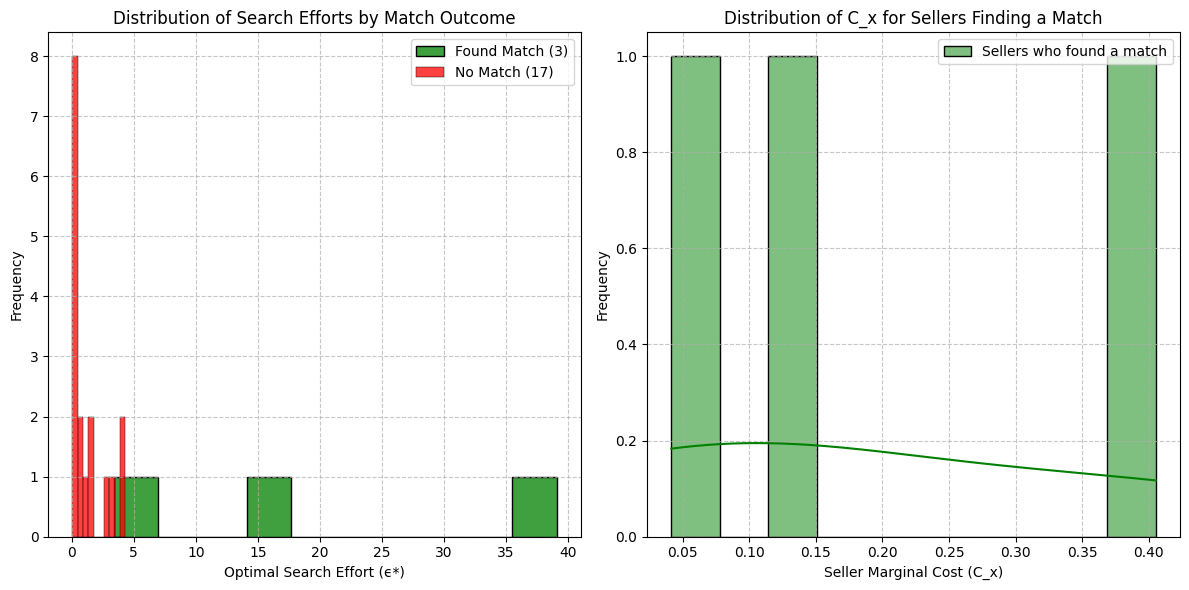

Average effort of sellers who found a match: 19.0715
Average effort of sellers who did NOT find a match: 1.3003

--- End of Step 6 Demonstration ---


In [9]:
# --- (Assuming Steps 1-5 code is available or re-run) ---
# For brevity, I'll just list the functions needed from previous steps
# generate_exporter_costs, create_initial_buyer_seller_links,
# solve_all_buyer_systems, compute_buyer_cost_indices,
# seller_upkeep_cost, calculate_trade_quantities_and_seller_profit,
# get_seller_optimal_search_effort

# --- Parameters (re-iterate those relevant for this step) ---
# From Step 5, used in get_seller_optimal_search_effort
kappa_0_param = 0.5
phi_S_param = 0.1 # Matches per unit of seller visibility (φS in Eq. 29, assuming ψS=1)
upkeep_cost_coeff_seller_param = 0.01

# Model parameters
sigma_param = 4.5
eta_param = 1.5
theta_param = 0.7
P_market_param = 1.0
E_market_param = 1.0
# --- End of Prerequisite Parameter Setup ---

# --- Step 6: Simulate Arrival of New Buyers (Matching) ---

def simulate_new_buyer_matches(
    num_sellers,
    seller_optimal_efforts, # Epsilon_star_x from Step 5
    C_y_buyer_values,       # Empirical F_y from Step 4
    phi_S,                  # Matches per unit of seller visibility (φS)
    random_seed=None
    ):
    """
    Simulates the arrival of new buyer leads for each seller based on their search effort.
    If a seller finds a lead, the buyer is drawn randomly from the productive buyer pool.

    Parameters:
    ----------
    num_sellers : int
        The total number of sellers (N_x).
    seller_optimal_efforts : numpy.ndarray
        Array of optimal search efforts (epsilon*_x) for each seller.
    C_y_buyer_values : numpy.ndarray
        Array of cost indices (C_y) for all buyers (empirical F_y).
    phi_S : float
        Matches per unit of seller visibility (φS), assuming ψS=1.
    random_seed : int, optional
        Seed for the random number generator.

    Returns:
    -------
    list of tuples
        A list where each element corresponds to a seller.
        If seller_idx finds a match: (seller_idx, matched_buyer_original_idx, C_y_of_matched_buyer)
        If seller_idx does not find a match: (seller_idx, None, None)
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    new_matches_found = [] # Stores (seller_idx, matched_buyer_idx, C_y_of_match)

    # Identify productive buyers (C_y < infinity)
    productive_buyer_indices = np.where(np.isfinite(C_y_buyer_values))[0]

    if len(productive_buyer_indices) == 0:
        # No productive buyers to match with
        print("Warning: No productive buyers available for matching in simulate_new_buyer_matches.")
        for s_idx in range(num_sellers):
            new_matches_found.append({'seller_idx': s_idx, 'matched_buyer_idx': None, 'c_y_lead': None, 'found_match': False})
        return new_matches_found

    for s_idx in range(num_sellers):
        epsilon_star_s = seller_optimal_efforts[s_idx]

        # Probability of seller s_idx finding one lead (assuming psi_S = 1)
        # P_match_s = V_s * phi_S = epsilon_star_s * phi_S
        # Capped at 1, as it's a probability.
        prob_match_s = min(1.0, epsilon_star_s * phi_S)

        # Bernoulli trial: does seller s_idx find a match?
        if np.random.rand() < prob_match_s:
            # Yes, seller s_idx finds a match.
            # Draw a buyer uniformly at random from the pool of *productive* buyers.
            matched_buyer_original_idx = np.random.choice(productive_buyer_indices)
            c_y_of_matched_buyer = C_y_buyer_values[matched_buyer_original_idx]

            new_matches_found.append({
                'seller_idx': s_idx,
                'matched_buyer_idx': matched_buyer_original_idx, # Original index of the buyer
                'c_y_lead': c_y_of_matched_buyer,
                'found_match': True
            })
        else:
            # No, seller s_idx does not find a match.
            new_matches_found.append({
                'seller_idx': s_idx,
                'matched_buyer_idx': None,
                'c_y_lead': None,
                'found_match': False
            })

    return new_matches_found


# --- Helper functions from previous steps (condensed for this script) ---
# (These would typically be imported from other modules/cells in a notebook)
def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    if random_seed is not None: np.random.seed(random_seed)
    return np.random.exponential(scale=scale_parameter_cx, size=num_exporters)

def create_initial_buyer_seller_links(num_buyers, num_sellers, lambda_poisson_links, random_seed=None):
    if random_seed is not None: np.random.seed(random_seed)
    links = []; s_indices = np.arange(num_sellers)
    for _ in range(num_buyers):
        n_sellers = min(np.random.poisson(lam=lambda_poisson_links), num_sellers)
        links.append(list(np.random.choice(s_indices, size=n_sellers, replace=False)) if n_sellers > 0 else [])
    return links

P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym = sym.symbols('P_xy C_y C_x sigma theta eta')
FOC_lhs = 1 / (1 - x_sym / P_sym); FOC_rhs_term1_factor = (sigma_sym - 1) * ((1 - theta_sym) / theta_sym)
FOC_rhs_term1_denom_inner_base = (1 - (P_sym / y_sym)**(eta_sym - 1)); FOC_rhs_term1_denom_inner_power = (sigma_sym - 1) / (eta_sym - 1)
FOC_rhs_term1_denom = (1 - FOC_rhs_term1_denom_inner_base**FOC_rhs_term1_denom_inner_power)
FOC_rhs_term1 = eta_sym + FOC_rhs_term1_factor * (1 / FOC_rhs_term1_denom) * (P_sym / y_sym)**(-(eta_sym - 1))
FOC_rhs_term2 = (sigma_sym - eta_sym) * (P_sym / y_sym); FOC_rhs = FOC_rhs_term1 + FOC_rhs_term2
FOC_equation_residual = FOC_lhs - FOC_rhs
foc_bargaining_residual_func = sym.lambdify((P_sym, y_sym, x_sym, sigma_sym, theta_sym, eta_sym), FOC_equation_residual, modules='numpy')

def solve_buyer_bargaining_system(buyer_idx, sellers_for_this_buyer, all_seller_costs, sigma, eta, theta):
    k = len(sellers_for_this_buyer); solved_prices = {}
    if k == 0: return solved_prices
    s_costs = np.array([all_seller_costs[s_idx] for s_idx in sellers_for_this_buyer])
    if k == 1:
        c_x = s_costs[0]; p = c_x*((sigma+theta-1)/(sigma-1)) if (sigma-1)!=0 else c_x*1e9
        solved_prices[sellers_for_this_buyer[0]] = max(p, c_x*(1+1e-6)); return solved_prices
    def system_res(p_vec):
        res = np.empty(k)
        for i in range(k):
            p_xi,c_xi=p_vec[i],s_costs[i]; s_o_p_t=sum(max(p_vec[j],1e-9)**(1-eta) for j in range(k) if i!=j)
            c_y_m_xi=s_o_p_t**(1/(1-eta)) if s_o_p_t>0 else 1e9; p_eval=max(p_xi,c_xi*(1+1e-7))
            try: res[i]=foc_bargaining_residual_func(p_eval,max(c_y_m_xi,1e-9),c_xi,sigma,theta,eta)
            except: res[i]=np.sign(p_eval-c_xi if c_xi!=0 else p_eval)*1e9
        return res
    init_p = np.maximum(s_costs*1.1,s_costs*(1+1e-6))
    try: sol_p,_,ier,_=fsolve(system_res,init_p,full_output=True,xtol=1e-7); assert ier==1
    except: sol_p=init_p
    for i in range(k): solved_prices[sellers_for_this_buyer[i]]=max(sol_p[i],s_costs[i]*(1+1e-6))
    return solved_prices
def solve_all_buyer_systems(N_y,C_x,links_b_s,sig,et,th): return [solve_buyer_bargaining_system(b_idx,links_b_s[b_idx],C_x,sig,et,th) for b_idx in range(N_y)]
def compute_buyer_cost_indices(N_y,solved_prices,eta):
    C_y_vals=np.empty(N_y)
    if (1-eta)==0: C_y_vals[:]=np.inf; return C_y_vals
    for b_idx in range(N_y):
        prices_dict=solved_prices[b_idx]
        if not prices_dict: C_y_vals[b_idx]=np.inf; continue
        s_p_t=sum(max(p,1e-9)**(1-eta) for p in prices_dict.values())
        C_y_vals[b_idx]=s_p_t**(1/(1-eta)) if s_p_t>0 else np.inf
    return C_y_vals
def seller_upkeep_cost(n_cust, upkeep_coeff): return upkeep_coeff*(n_cust**2)
def calculate_trade_quantities_and_seller_profit(s_idx,c_x_s,b_p_prices,all_C_y,sig,et,P_m,E_m):
    tot_prof=0
    for b_idx,p_xy in b_p_prices.items():
        c_y_b=all_C_y[b_idx]
        if c_y_b==np.inf or p_xy<=c_x_s: continue
        p_y_b=(sig/(sig-1))*c_y_b if (sig-1)!=0 else c_y_b*1e9
        q_y_b=(p_y_b**(-sig))*(P_m**(sig-1))*E_m; E_y_b=c_y_b*q_y_b
        q_xy=(max(p_xy,1e-9)**(-et))*(c_y_b**(et-1))*E_y_b
        prof_tb=(p_xy-c_x_s)*q_xy
        if prof_tb>0: tot_prof+=prof_tb
    return tot_prof
def get_seller_optimal_search_effort(N_x,N_y,C_x,C_y_b_vals,curr_links_s_b,curr_prices_s_b,sig,et,th,P_m,E_m,kap0,phiS,up_coeff_s):
    opt_eff=np.empty(N_x); prod_b_idx=np.where(np.isfinite(C_y_b_vals))[0]
    if len(prod_b_idx)==0: opt_eff[:]=0; return opt_eff
    for s_idx in range(N_x):
        c_x_s=C_x[s_idx]; curr_b_port_idx=curr_links_s_b[s_idx]; curr_n_cust=len(curr_b_port_idx)
        curr_trade_prof=calculate_trade_quantities_and_seller_profit(s_idx,c_x_s,curr_prices_s_b[s_idx],C_y_b_vals,sig,et,P_m,E_m)
        curr_net_prof=curr_trade_prof-seller_upkeep_cost(curr_n_cust,up_coeff_s); exp_W=0
        for new_b_orig_idx in prod_b_idx:
            c_y_l=C_y_b_vals[new_b_orig_idx]; p_xyl_g=c_x_s*1.1
            try:
                p_xyl_s_res=least_squares(foc_bargaining_residual_func,x0=max(p_xyl_g,c_x_s*(1+1e-6)),args=(max(c_y_l,1e-9),c_x_s,sig,th,et),bounds=((c_x_s*(1+1e-7)),np.inf))
                p_xyl=p_xyl_s_res.x[0]; assert p_xyl_s_res.success and p_xyl>c_x_s
            except: p_xyl=c_x_s*1.05
            p_xyl=max(p_xyl,c_x_s*(1+1e-6)); p_y_l=(sig/(sig-1))*c_y_l if (sig-1)!=0 else c_y_l*1e9
            q_y_l_fg=(p_y_l**(-sig))*(P_m**(sig-1))*E_m; E_y_l=c_y_l*q_y_l_fg
            q_xyl_int=(p_xyl**(-et))*(c_y_l**(et-1))*E_y_l; prof_new_l_trade=max(0,(p_xyl-c_x_s)*q_xyl_int)
            net_prof_g=(curr_trade_prof+prof_new_l_trade)-seller_upkeep_cost(curr_n_cust+1,up_coeff_s); net_prof_c=-np.inf
            if curr_n_cust>0:
                worst_c_prof=np.inf
                if curr_prices_s_b[s_idx]:
                    profs_curr_b=[calculate_trade_quantities_and_seller_profit(s_idx,c_x_s,{b:p},C_y_b_vals,sig,et,P_m,E_m) for b,p in curr_prices_s_b[s_idx].items() if C_y_b_vals[b]!=np.inf and p>c_x_s]
                    if profs_curr_b: worst_c_prof=min(p for p in profs_curr_b if p>0) # profit from single worst customer
                if worst_c_prof!=np.inf: net_prof_c=(curr_trade_prof-worst_c_prof+prof_new_l_trade)-seller_upkeep_cost(curr_n_cust,up_coeff_s)
                else: net_prof_c = (prof_new_l_trade) - seller_upkeep_cost(curr_n_cust,up_coeff_s) # no profitable worst to drop
            best_net_prof_act=max(curr_net_prof-curr_net_prof, net_prof_g-curr_net_prof) # W for ignore, W for grow
            if curr_n_cust > 0 and net_prof_c > -np.inf : best_net_prof_act = max(best_net_prof_act, net_prof_c - curr_net_prof) # W for churn
            exp_W+=best_net_prof_act
        if len(prod_b_idx)>0: exp_W/=len(prod_b_idx)
        else: exp_W=0
        opt_eff[s_idx]=(phiS/(2*kap0))*max(0,exp_W) if kap0>0 else (np.inf if exp_W>0 else 0)
    return opt_eff
# --- End of Helper Functions ---


# --- Testing and Demonstration of Step 6 ---
if __name__ == '__main__':
    # Parameters from previous steps
    N_x = 20
    beta_cx = 2.0
    C_x_values = generate_exporter_costs(N_x, beta_cx, random_seed=42)

    N_y = 10
    avg_sellers_per_buyer = 2.0
    initial_links_b_s = create_initial_buyer_seller_links(N_y, N_x, avg_sellers_per_buyer, random_seed=123)

    initial_links_s_b = [[] for _ in range(N_x)]
    current_bilateral_prices_s_b = [{} for _ in range(N_x)]
    solved_prices_all_buyers_step3 = solve_all_buyer_systems(N_y, C_x_values, initial_links_b_s, sigma_param, eta_param, theta_param)
    for b_idx, prices_dict in enumerate(solved_prices_all_buyers_step3):
        for s_idx, price in prices_dict.items():
            initial_links_s_b[s_idx].append(b_idx)
            current_bilateral_prices_s_b[s_idx][b_idx] = price

    C_y_buyer_values = compute_buyer_cost_indices(N_y, solved_prices_all_buyers_step3, eta_param)

    # Run Step 5 to get optimal search efforts
    print("Calculating optimal search efforts for Step 6 demo...")
    with np.errstate(divide='ignore', invalid='ignore'):
        seller_optimal_efforts = get_seller_optimal_search_effort(
            N_x, N_y, C_x_values, C_y_buyer_values,
            initial_links_s_b, current_bilateral_prices_s_b,
            sigma_param, eta_param, theta_param, P_market_param, E_market_param,
            kappa_0_param, phi_S_param, upkeep_cost_coeff_seller_param
        )
    print("Done calculating optimal search efforts.")

    print(f"\n--- Simulating Step 6: New Buyer Matches based on Search Effort ---")
    print(f"Using phi_S (matches per visibility) = {phi_S_param}")

    # Simulate new matches
    newly_matched_leads = simulate_new_buyer_matches(
        N_x,
        seller_optimal_efforts,
        C_y_buyer_values,
        phi_S_param,
        random_seed=789
    )

    # Display results
    print(f"\nMatching results for all {N_x} sellers:")
    matches_count = 0
    for match_info in newly_matched_leads:
        if match_info['found_match']:
            matches_count += 1
            print(f"  Seller {match_info['seller_idx']} (C_x={C_x_values[match_info['seller_idx']]:.2f}, effort={seller_optimal_efforts[match_info['seller_idx']]:.3f}) "
                  f"FOUND a new lead: Buyer {match_info['matched_buyer_idx']} (C_y={match_info['c_y_lead']:.3f})")
        # else:
        #     print(f"  Seller {match_info['seller_idx']} (C_x={C_x_values[match_info['seller_idx']]:.2f}, effort={seller_optimal_efforts[match_info['seller_idx']]:.3f}) "
        #           f"did NOT find a new lead.")

    print(f"\nTotal new matches found in this round: {matches_count} out of {N_x} sellers.")

    if N_x > 0 :
        avg_effort = np.mean(seller_optimal_efforts[np.isfinite(seller_optimal_efforts)])
        print(f"Average search effort (finite): {avg_effort:.4f}")
        if avg_effort > 0 and phi_S_param > 0:
             expected_matches_approx = N_x * min(1.0, avg_effort * phi_S_param) # Very rough
             print(f"Roughly expected matches based on avg effort: {expected_matches_approx:.2f}")


    # --- Further Insights (Optional) ---
    if matches_count > 0:
        efforts_of_successful_sellers = [seller_optimal_efforts[m['seller_idx']] for m in newly_matched_leads if m['found_match']]
        efforts_of_unsuccessful_sellers = [seller_optimal_efforts[m['seller_idx']] for m in newly_matched_leads if not m['found_match']]

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        if efforts_of_successful_sellers:
            sns.histplot(efforts_of_successful_sellers, kde=False, color='green', label=f'Found Match ({len(efforts_of_successful_sellers)})', bins=10)
        if efforts_of_unsuccessful_sellers:
            sns.histplot(efforts_of_unsuccessful_sellers, kde=False, color='red', label=f'No Match ({len(efforts_of_unsuccessful_sellers)})', bins=10)
        plt.title('Distribution of Search Efforts by Match Outcome')
        plt.xlabel('Optimal Search Effort (ϵ*)')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        costs_of_successful_sellers = [C_x_values[m['seller_idx']] for m in newly_matched_leads if m['found_match']]
        plt.subplot(1, 2, 2)
        if costs_of_successful_sellers:
            sns.histplot(costs_of_successful_sellers, kde=True, color='green', label=f'Sellers who found a match', bins=10)
        plt.title('Distribution of C_x for Sellers Finding a Match')
        plt.xlabel('Seller Marginal Cost (C_x)')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

        if efforts_of_successful_sellers:
             print(f"Average effort of sellers who found a match: {np.mean(efforts_of_successful_sellers):.4f}")
        if efforts_of_unsuccessful_sellers:
             print(f"Average effort of sellers who did NOT find a match: {np.mean(efforts_of_unsuccessful_sellers):.4f}")


    print("\n--- End of Step 6 Demonstration ---")

# Iterate the process for a certain number of periods and check if it converges.

Starting simulation for 50 periods...

--- Period 1 ---
  Period 1 Metrics: Avg C_y=1.671, Total Links=58, Avg Effort=4.7707, Matches=6

--- Period 2 ---
  Period 2 Metrics: Avg C_y=2.090, Total Links=81, Avg Effort=19312.7113, Matches=49

--- Period 3 ---
  Period 3 Metrics: Avg C_y=1.031, Total Links=108, Avg Effort=26674.9737, Matches=49

--- Period 4 ---
  Period 4 Metrics: Avg C_y=1.354, Total Links=143, Avg Effort=12121.2339, Matches=47

--- Period 5 ---
  Period 5 Metrics: Avg C_y=1.325, Total Links=171, Avg Effort=41072.4450, Matches=50

--- Period 6 ---
  Period 6 Metrics: Avg C_y=0.698, Total Links=201, Avg Effort=97000.4239, Matches=50

--- Period 7 ---
  Period 7 Metrics: Avg C_y=0.010, Total Links=228, Avg Effort=155151.5901, Matches=50

--- Period 8 ---
  Period 8 Metrics: Avg C_y=0.007, Total Links=258, Avg Effort=536298.7968, Matches=50

--- Period 9 ---
  Period 9 Metrics: Avg C_y=0.005, Total Links=280, Avg Effort=691025.1231, Matches=50

--- Period 10 ---
  Period 10

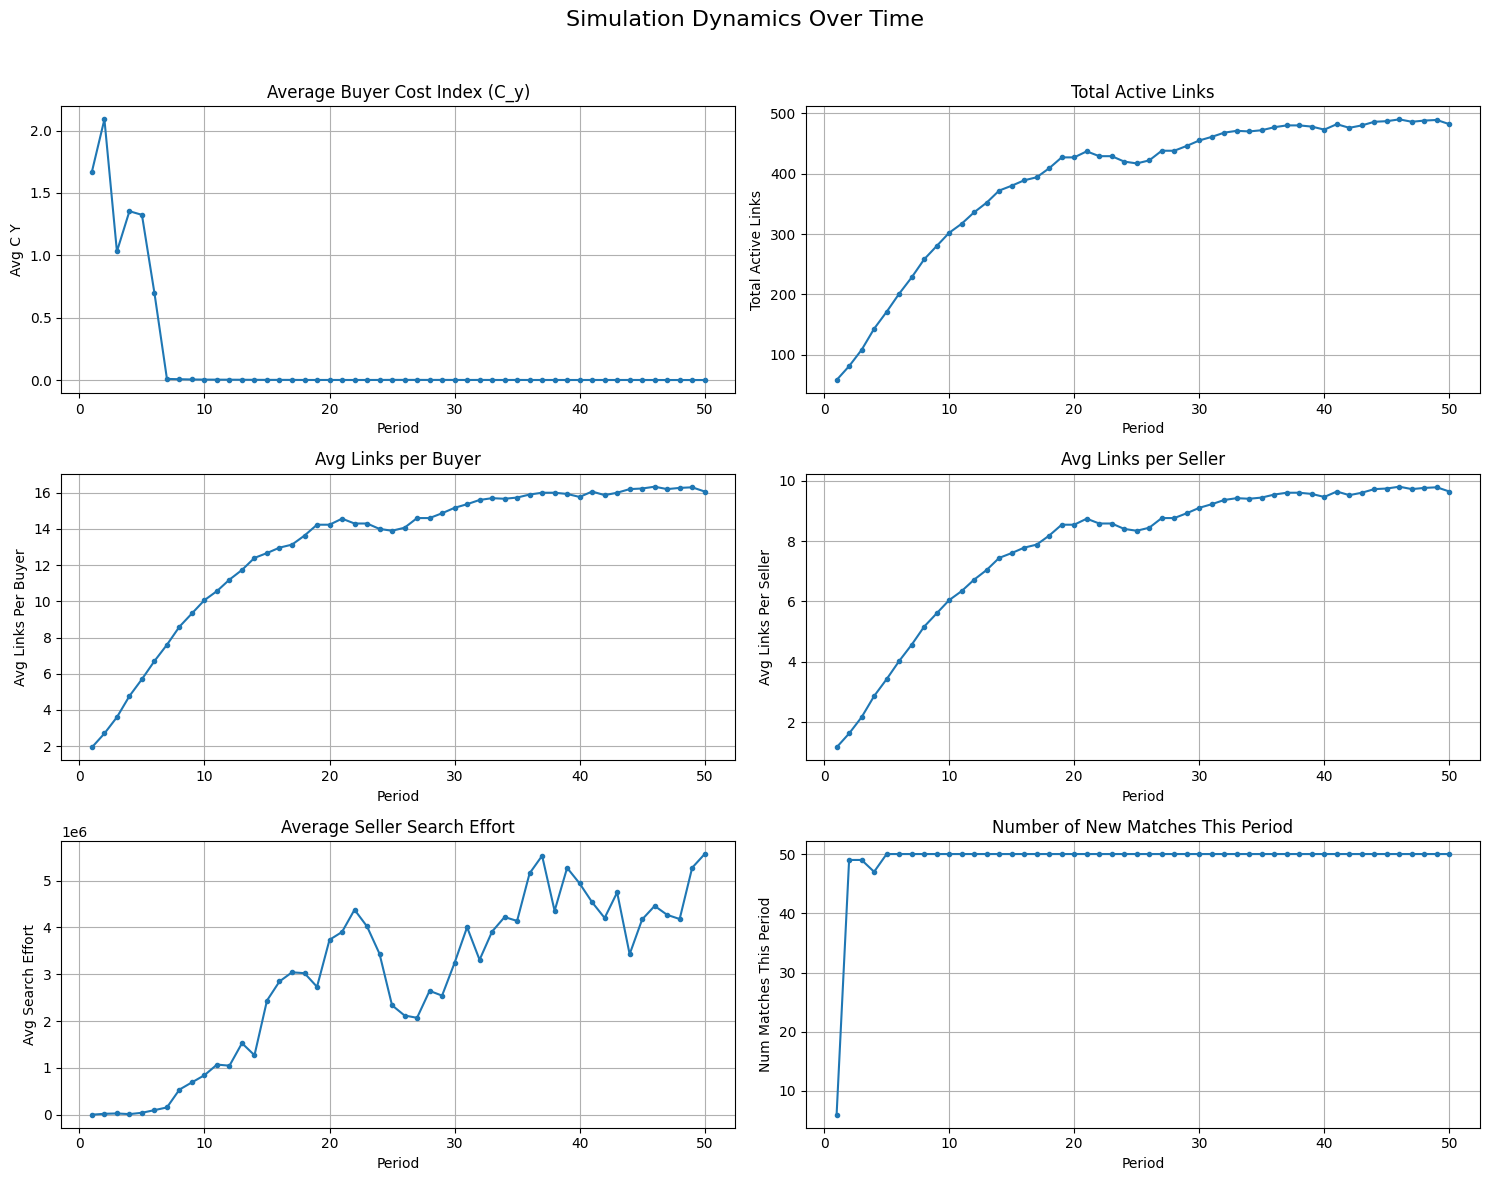

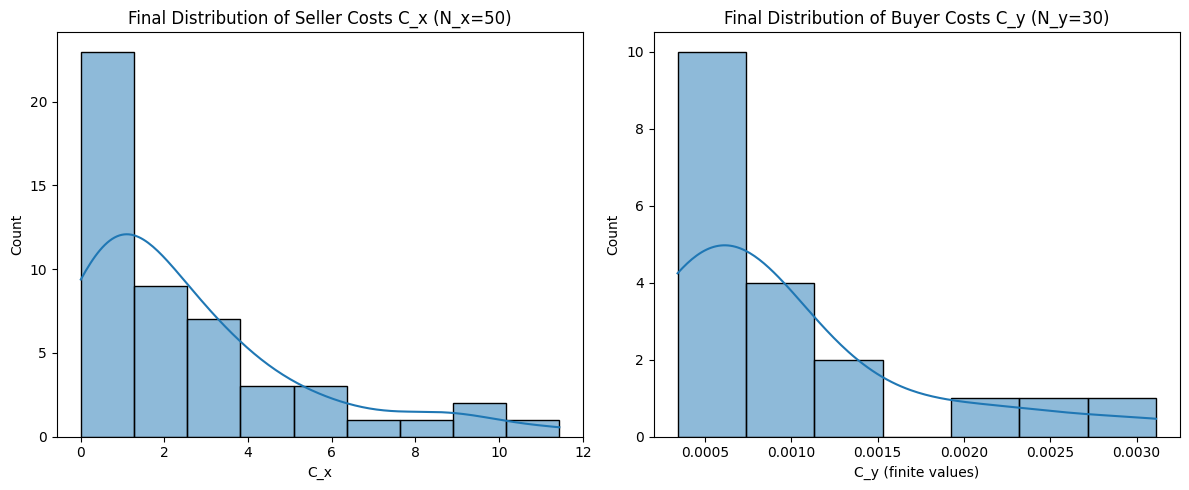

In [1]:
import numpy as np
import sympy as sym
from scipy.optimize import fsolve, least_squares
import matplotlib.pyplot as plt
import seaborn as sns
import copy # For deep copying network structures if needed

# --- (Condensed versions of previous step functions for this script) ---
# (In a real project, these would be imported)
def generate_exporter_costs(num_exporters, scale_parameter_cx, random_seed=None):
    if random_seed is not None: np.random.seed(random_seed)
    return np.random.exponential(scale=scale_parameter_cx, size=num_exporters)

def create_initial_buyer_seller_links(num_buyers, num_sellers, lambda_poisson_links, random_seed=None):
    if random_seed is not None: np.random.seed(random_seed)
    links = []; s_indices = np.arange(num_sellers)
    for _ in range(num_buyers):
        n_sellers = min(np.random.poisson(lam=lambda_poisson_links), num_sellers)
        links.append(list(np.random.choice(s_indices, size=n_sellers, replace=False)) if n_sellers > 0 else [])
    return links

# Lambdified FOC function (ensure variable names are unique if this is in a large script)
P_sym_foc, y_sym_foc, x_sym_foc, sigma_sym_foc, theta_sym_foc, eta_sym_foc = sym.symbols('P_xy C_y C_x sigma theta eta')
FOC_lhs_foc = 1/(1-x_sym_foc/P_sym_foc)
FOC_rhs_t1_factor_foc=(sigma_sym_foc-1)*((1-theta_sym_foc)/theta_sym_foc)
FOC_rhs_t1_den_in_base_foc=(1-(P_sym_foc/y_sym_foc)**(eta_sym_foc-1))
FOC_rhs_t1_den_in_pow_foc=(sigma_sym_foc-1)/(eta_sym_foc-1)
# Added a small epsilon to prevent FOC_rhs_t1_den_in_base_foc from being exactly 1 if eta_sym_foc=1 or P_sym_foc=0
FOC_rhs_t1_den_foc=(1-(FOC_rhs_t1_den_in_base_foc+1e-12)**FOC_rhs_t1_den_in_pow_foc)
FOC_rhs_t1_val_foc=eta_sym_foc+FOC_rhs_t1_factor_foc*(1/(FOC_rhs_t1_den_foc+1e-12))*(P_sym_foc/y_sym_foc)**(-(eta_sym_foc-1)) # Added epsilon to denominator
FOC_rhs_t2_foc=(sigma_sym_foc-eta_sym_foc)*(P_sym_foc/y_sym_foc)
FOC_rhs_foc_calc=FOC_rhs_t1_val_foc+FOC_rhs_t2_foc
FOC_eq_res_foc=FOC_lhs_foc-FOC_rhs_foc_calc
foc_bargaining_residual_func = sym.lambdify((P_sym_foc,y_sym_foc,x_sym_foc,sigma_sym_foc,theta_sym_foc,eta_sym_foc),FOC_eq_res_foc,modules='numpy')


def solve_buyer_bargaining_system(b_idx, s_for_b, all_c_x, sig, et, th):
    k=len(s_for_b); sol_p={};
    if k==0: return sol_p
    s_costs=np.array([all_c_x[s_idx] for s_idx in s_for_b]) # Corrected s to s_idx for clarity
    if k==1:
        c_x1=s_costs[0];
        p1=c_x1*((sig+th-1)/(sig-1)) if (sig-1)!=0 else c_x1*1e9;
        sol_p[s_for_b[0]]=max(p1,c_x1*(1+1e-6)); return sol_p
    def sys_res(p_v):
        r=np.empty(k)
        for i in range(k):
            p_i,c_i=p_v[i],s_costs[i];
            s_o_p=sum(max(p_v[j],1e-9)**(1-et) for j in range(k) if i!=j)
            c_y_m_i=s_o_p**(1/(1-et)) if s_o_p>0 else 1e9;
            p_e=max(p_i,c_i*(1+1e-7))
            try: r[i]=foc_bargaining_residual_func(p_e,max(c_y_m_i,1e-9),c_i,sig,th,et)
            except (ZeroDivisionError, ValueError, OverflowError): r[i]=np.sign(p_e-c_i if c_i!=0 else p_e)*1e9 # Catch more errors
        return r
    init_g=np.maximum(s_costs*1.1,s_costs*(1+1e-6))
    try: sol_v,_,ier,_=fsolve(sys_res,init_g,full_output=True,xtol=1e-7); assert ier==1
    except: sol_v=init_g # Fallback to initial guess
    for i in range(k): sol_p[s_for_b[i]]=max(sol_v[i],s_costs[i]*(1+1e-6))
    return sol_p

def solve_all_buyer_systems(N_y,C_x,links_b_s,sig,et,th):
    return [solve_buyer_bargaining_system(b_idx,links_b_s[b_idx],C_x,sig,et,th) for b_idx in range(N_y)] # Corrected b to b_idx

def compute_buyer_cost_indices(N_y,sol_prices,et):
    C_y_v=np.empty(N_y)
    if abs(1-et) < 1e-9 : # Check for eta close to 1 (Cobb-Douglas case)
        # For Cobb-Douglas, C_y = Product(P_xy^alpha_xy) if weights sum to 1.
        # The provided CES formula (P_xy^(1-eta)) becomes P_xy^0 = 1.
        # sum_prices_term would be num_sellers. (num_sellers)^(1/0) is problematic.
        # This case needs specific handling based on economic theory if eta=1 is allowed.
        # For now, if eta is very close to 1, assign inf as the current formula breaks.
        print(f"Warning: eta={et} is close to 1. CES formula for C_y might be inappropriate. Assigning Inf.")
        C_y_v[:]=np.inf; return C_y_v
    for b_idx in range(N_y): # Corrected b to b_idx
        p_dict=sol_prices[b_idx]
        if not p_dict: C_y_v[b_idx]=np.inf; continue
        s_p_t=sum(max(p_val,1e-9)**(1-et) for p_val in p_dict.values()) # Corrected p to p_val
        if s_p_t <= 0 and (1-et) < 0 : # e.g. sum is positive, but 1-eta is negative, leading to issues if s_p_t is tiny
             C_y_v[b_idx]=np.inf
        else:
            try:
                C_y_v[b_idx]=s_p_t**(1/(1-et))
            except (ZeroDivisionError, ValueError, OverflowError): # Catch more errors
                C_y_v[b_idx]=np.inf
    return C_y_v

def seller_upkeep_cost(n_cust,up_coeff): return up_coeff*(n_cust**2)

def calculate_trade_quantities_and_seller_profit(s_idx_calc,c_x_s,b_p_prices,all_C_y,sig,et,P_m,E_m): # Renamed s_idx to s_idx_calc
    t_p=0
    for b_idx_calc,p_xy in b_p_prices.items(): # Renamed b_idx to b_idx_calc
        c_y_b=all_C_y[b_idx_calc]
        if c_y_b==np.inf or p_xy<=c_x_s: continue
        p_y_b=(sig/(sig-1))*c_y_b if (sig-1)!=0 else c_y_b*1e9
        q_y_b=(p_y_b**(-sig))*(P_m**(sig-1))*E_m; E_y_b=c_y_b*q_y_b
        q_xy=(max(p_xy,1e-9)**(-et))*(c_y_b**(et-1))*E_y_b # Ensure c_y_b is positive for power
        p_tb=(p_xy-c_x_s)*q_xy
        if p_tb>0: t_p+=p_tb
    return t_p

def get_seller_optimal_search_effort(N_x_es,N_y_es,C_x_es,C_y_b_vals_es,curr_links_s_b_es,curr_prices_s_b_es, # Renamed params
                                     sig,et,th,P_m,E_m,kap0,phiS,up_coeff_s):
    opt_eff=np.empty(N_x_es); prod_b_idx_es=np.where(np.isfinite(C_y_b_vals_es))[0] # Renamed
    if len(prod_b_idx_es)==0: opt_eff[:]=0; return opt_eff

    for s_idx_es_loop in range(N_x_es): # Renamed s_idx to s_idx_es_loop
        c_x_s_val=C_x_es[s_idx_es_loop]; curr_b_port_idx_val=curr_links_s_b_es[s_idx_es_loop]; # Renamed
        curr_n_cust_val=len(curr_b_port_idx_val); # Renamed

        current_seller_prices = curr_prices_s_b_es[s_idx_es_loop] if s_idx_es_loop < len(curr_prices_s_b_es) else {}

        curr_trade_prof_val=calculate_trade_quantities_and_seller_profit(s_idx_es_loop,c_x_s_val,current_seller_prices,C_y_b_vals_es,sig,et,P_m,E_m) # Renamed
        curr_net_prof_val=curr_trade_prof_val-seller_upkeep_cost(curr_n_cust_val,up_coeff_s); exp_W_val=0 # Renamed

        for new_b_orig_idx_val in prod_b_idx_es: # Renamed
            c_y_l_val=C_y_b_vals_es[new_b_orig_idx_val]; p_xyl_g_val=c_x_s_val*1.1 # Renamed
            try:
                p_xyl_s_res_val=least_squares(foc_bargaining_residual_func,x0=max(p_xyl_g_val,c_x_s_val*(1+1e-6)),args=(max(c_y_l_val,1e-9),c_x_s_val,sig,th,et),bounds=((c_x_s_val*(1+1e-7)),np.inf)) # Renamed
                p_xyl_val=p_xyl_s_res_val.x[0]; assert p_xyl_s_res_val.success and p_xyl_val>c_x_s_val # Renamed
            except: p_xyl_val=c_x_s_val*1.05
            p_xyl_val=max(p_xyl_val,c_x_s_val*(1+1e-6));
            p_y_l_val=(sig/(sig-1))*c_y_l_val if (sig-1)!=0 else c_y_l_val*1e9 # Renamed
            q_y_l_fg_val=(p_y_l_val**(-sig))*(P_m**(sig-1))*E_m; E_y_l_val=c_y_l_val*q_y_l_fg_val # Renamed
            q_xyl_int_val=(max(p_xyl_val, 1e-9)**(-et))*(max(c_y_l_val, 1e-9)**(et-1))*E_y_l_val # Renamed, added max for c_y_l_val
            prof_new_l_trade_val=max(0,(p_xyl_val-c_x_s_val)*q_xyl_int_val) # Renamed

            W_ignore_val = 0
            net_prof_grow_val = (curr_trade_prof_val + prof_new_l_trade_val) - seller_upkeep_cost(curr_n_cust_val + 1, up_coeff_s) # Renamed
            W_grow_val = net_prof_grow_val - curr_net_prof_val # Renamed

            W_churn_val = -np.inf # Renamed
            if curr_n_cust_val > 0:
                max_net_prof_churn_val_iter = -np.inf # Renamed
                for b_curr_idx_to_drop_val in curr_b_port_idx_val: # Renamed
                    profit_from_b_curr_trade_val = 0
                    if b_curr_idx_to_drop_val in current_seller_prices:
                         profit_from_b_curr_trade_val = calculate_trade_quantities_and_seller_profit(s_idx_es_loop,c_x_s_val,{b_curr_idx_to_drop_val:current_seller_prices[b_curr_idx_to_drop_val]},C_y_b_vals_es,sig,et,P_m,E_m) # Renamed

                    temp_trade_prof_churn_val = curr_trade_prof_val - profit_from_b_curr_trade_val + prof_new_l_trade_val # Renamed
                    temp_net_prof_churn_val = temp_trade_prof_churn_val - seller_upkeep_cost(curr_n_cust_val, up_coeff_s)
                    if temp_net_prof_churn_val > max_net_prof_churn_val_iter:
                        max_net_prof_churn_val_iter = temp_net_prof_churn_val
                if max_net_prof_churn_val_iter > -np.inf : W_churn_val = max_net_prof_churn_val_iter - curr_net_prof_val

            exp_W_val += max(W_ignore_val, W_grow_val, W_churn_val)

        if len(prod_b_idx_es)>0: exp_W_val/=len(prod_b_idx_es)
        else: exp_W_val=0
        opt_eff[s_idx_es_loop]=(phiS/(2*kap0))*max(0,exp_W_val) if kap0>0 else (np.inf if exp_W_val>0 else 0)
    return opt_eff

# Corrected condensed simulate_new_buyer_matches to use verbose keys
def simulate_new_buyer_matches(num_sellers_match,seller_opt_eff_match,C_y_b_vals_match,phiS_p_match,rand_seed=None): # Renamed params
    if rand_seed is not None: np.random.seed(rand_seed)
    new_matches_list=[]; prod_b_idx_match=np.where(np.isfinite(C_y_b_vals_match))[0] # Renamed

    if len(prod_b_idx_match)==0:
        for s_idx_match_loop in range(num_sellers_match): # Renamed
            new_matches_list.append({
                'seller_idx': s_idx_match_loop,
                'matched_buyer_idx': None,
                'c_y_lead': None,
                'found_match': False # Use 'found_match'
            })
        return new_matches_list

    for s_idx_match_loop in range(num_sellers_match): # Renamed
        prob_m_val=min(1.0,seller_opt_eff_match[s_idx_match_loop]*phiS_p_match) # Renamed
        if np.random.rand()<prob_m_val:
            m_b_idx_val_match=np.random.choice(prod_b_idx_match); c_y_l_val_match=C_y_b_vals_match[m_b_idx_val_match] # Renamed
            new_matches_list.append({
                'seller_idx': s_idx_match_loop,
                'matched_buyer_idx': m_b_idx_val_match,
                'c_y_lead': c_y_l_val_match,
                'found_match': True # Use 'found_match'
            })
        else:
            new_matches_list.append({
                'seller_idx': s_idx_match_loop,
                'matched_buyer_idx': None,
                'c_y_lead': None,
                'found_match': False # Use 'found_match'
            })
    return new_matches_list
# --- End of Condensed Previous Step Functions ---

# --- Main Simulation Loop ---
def run_simulation(
    N_x, N_y, beta_cx_init, lambda_links_init, # Initial setup params
    sigma, eta, theta, P_market, E_market,     # Economic params
    kappa_0, phi_S, upkeep_coeff_s,            # Search/Upkeep params
    delta_attrition_rate,                      # Link dynamics
    num_periods_max,
    convergence_window, convergence_tolerance, convergence_stable_periods_required,
    main_random_seed=None
    ):

    if main_random_seed is not None:
        np.random.seed(main_random_seed)
        # Seed numpy's global random state for calls like np.random.choice, np.random.rand
        # If specific sub-function calls need independent streams, pass a seed generator or new seeds.

    # --- 1. Initialization ---
    C_x_values = generate_exporter_costs(N_x, beta_cx_init, random_seed=np.random.randint(100000))
    current_links_b_s = create_initial_buyer_seller_links(N_y, N_x, lambda_links_init, random_seed=np.random.randint(100000))

    history_metrics = {
        'period': [], 'avg_C_y': [], 'avg_links_per_buyer': [],
        'avg_links_per_seller': [], 'total_active_links': [],
        'avg_search_effort': [], 'num_matches_this_period': []
    }

    print(f"Starting simulation for {num_periods_max} periods...")
    if abs(1-eta) < 1e-9:
        print(f"CRITICAL WARNING: eta parameter is {eta}, which is very close to 1. "
              "The CES formulas used (especially for C_y calculation) assume eta != 1. "
              "Results may be unreliable or lead to errors. Consider adjusting eta or implementing specific Cobb-Douglas logic.")


    for t in range(num_periods_max):
        current_period_random_seed_base = np.random.randint(100000) # Base seed for this period
        print(f"\n--- Period {t+1} ---")

        current_links_s_b = [[] for _ in range(N_x)]
        num_active_links_current = 0
        for b_idx_links, seller_list_for_buyer in enumerate(current_links_b_s): # Renamed b_idx
            for s_idx_in_list in seller_list_for_buyer:
                if 0 <= s_idx_in_list < N_x: # Boundary check
                    current_links_s_b[s_idx_in_list].append(b_idx_links)
                    num_active_links_current +=1
                else:
                    print(f"Warning: Invalid seller index {s_idx_in_list} found for buyer {b_idx_links} in period {t+1}. Max N_x={N_x-1}")

        with np.errstate(divide='ignore', invalid='ignore'):
            solved_prices_all_buyers = solve_all_buyer_systems(N_y, C_x_values, current_links_b_s, sigma, eta, theta)

        current_bilateral_prices_s_b = [{} for _ in range(N_x)]
        for b_idx_prices, prices_dict_for_buyer in enumerate(solved_prices_all_buyers): # Renamed b_idx
            for s_idx_prices, price_val in prices_dict_for_buyer.items(): # Renamed s_idx
                if 0 <= s_idx_prices < N_x: # Boundary check
                     current_bilateral_prices_s_b[s_idx_prices][b_idx_prices] = price_val
                else:
                    print(f"Warning: Invalid seller index {s_idx_prices} from solved_prices for buyer {b_idx_prices} in period {t+1}.")


        C_y_buyer_values = compute_buyer_cost_indices(N_y, solved_prices_all_buyers, eta)

        with np.errstate(divide='ignore', invalid='ignore'):
            seller_optimal_efforts = get_seller_optimal_search_effort(
                N_x, N_y, C_x_values, C_y_buyer_values,
                current_links_s_b, current_bilateral_prices_s_b,
                sigma, eta, theta, P_market, E_market,
                kappa_0, phi_S, upkeep_coeff_s
            )

        newly_matched_leads = simulate_new_buyer_matches(
            N_x, seller_optimal_efforts, C_y_buyer_values, phi_S, rand_seed=current_period_random_seed_base + 1 # Use period specific seed
        )
        # CORRECTED KEY: 'found_match' instead of 'f_m'
        num_matches_period = sum(1 for lead in newly_matched_leads if lead['found_match'])

        temp_links_b_s_after_pm = [list(sellers) for sellers in current_links_b_s]

        for lead_info in newly_matched_leads:
            # CORRECTED KEYS:
            if not lead_info['found_match']:
                continue
            s_idx_pm = lead_info['seller_idx'] # Was 's_idx'
            b_lead_idx_pm = lead_info['matched_buyer_idx'] # Was 'm_b_idx'
            c_y_b_lead_pm = lead_info['c_y_lead'] # Was 'c_y_l'

            if b_lead_idx_pm is None : continue # Should be caught by found_match but defensive

            c_x_s_pm = C_x_values[s_idx_pm] # Renamed

            current_portfolio_s_pm = list(current_links_s_b[s_idx_pm]) # Renamed
            current_prices_s_pm = current_bilateral_prices_s_b[s_idx_pm] # Renamed
            current_trade_profit_s_pm = calculate_trade_quantities_and_seller_profit(s_idx_pm, c_x_s_pm, current_prices_s_pm, C_y_buyer_values, sigma, eta, P_market, E_market) # Renamed
            current_upkeep_s_pm = seller_upkeep_cost(len(current_portfolio_s_pm), upkeep_coeff_s) # Renamed
            current_net_profit_s_pm = current_trade_profit_s_pm - current_upkeep_s_pm # Renamed

            p_s_blead_estimated_pm = c_x_s_pm * 1.05 # Renamed
            try:
                res_ls = least_squares(foc_bargaining_residual_func, x0=max(c_x_s_pm*1.1, c_x_s_pm*(1+1e-6)), args=(max(c_y_b_lead_pm,1e-9), c_x_s_pm, sigma, theta, eta), bounds=((c_x_s_pm*(1+1e-7)), np.inf)) # Renamed
                if res_ls.success and res_ls.x[0] > c_x_s_pm: p_s_blead_estimated_pm = res_ls.x[0]
            except: pass
            p_s_blead_estimated_pm = max(p_s_blead_estimated_pm, c_x_s_pm * (1 + 1e-6))

            p_y_l_temp_pm=(sigma/(sigma-1))*c_y_b_lead_pm if (sigma-1)!=0 else c_y_b_lead_pm*1e9 # Renamed
            q_y_l_fg_temp_pm=(p_y_l_temp_pm**(-sigma))*(P_market**(sigma-1))*E_market; E_y_l_temp_pm=c_y_b_lead_pm*q_y_l_fg_temp_pm # Renamed
            q_s_blead_int_temp_pm=(max(p_s_blead_estimated_pm,1e-9)**(-eta))*(max(c_y_b_lead_pm,1e-9)**(eta-1))*E_y_l_temp_pm # Renamed, added max for c_y_b_lead_pm
            profit_s_blead_estimated_trade_pm = max(0, (p_s_blead_estimated_pm - c_x_s_pm) * q_s_blead_int_temp_pm) # Renamed

            net_profit_ignore_pm = current_net_profit_s_pm # Renamed

            trade_profit_grow_pm = current_trade_profit_s_pm + profit_s_blead_estimated_trade_pm # Renamed
            upkeep_grow_pm = seller_upkeep_cost(len(current_portfolio_s_pm) + 1, upkeep_coeff_s) # Renamed
            net_profit_grow_pm = trade_profit_grow_pm - upkeep_grow_pm # Renamed

            net_profit_churn_pm = -np.inf # Renamed
            b_worst_to_drop_for_churn_pm = None # Renamed
            if len(current_portfolio_s_pm) > 0:
                max_hypothetical_net_profit_churn_pm = -np.inf # Renamed
                for b_curr_idx_to_drop_pm in current_portfolio_s_pm: # Renamed
                    profit_from_b_curr_trade_pm = 0 # Renamed
                    if b_curr_idx_to_drop_pm in current_prices_s_pm:
                        profit_from_b_curr_trade_pm = calculate_trade_quantities_and_seller_profit(s_idx_pm,c_x_s_pm,{b_curr_idx_to_drop_pm:current_prices_s_pm[b_curr_idx_to_drop_pm]},C_y_buyer_values,sigma,eta,P_market,E_market)

                    temp_trade_profit_churn_pm = current_trade_profit_s_pm - profit_from_b_curr_trade_pm + profit_s_blead_estimated_trade_pm # Renamed
                    temp_net_profit_churn_pm = temp_trade_profit_churn_pm - seller_upkeep_cost(len(current_portfolio_s_pm), upkeep_coeff_s) # Renamed
                    if temp_net_profit_churn_pm > max_hypothetical_net_profit_churn_pm:
                        max_hypothetical_net_profit_churn_pm = temp_net_profit_churn_pm
                        b_worst_to_drop_for_churn_pm = b_curr_idx_to_drop_pm
                if b_worst_to_drop_for_churn_pm is not None:
                     net_profit_churn_pm = max_hypothetical_net_profit_churn_pm

            best_action = "IGNORE"
            max_profit = net_profit_ignore_pm
            if net_profit_grow_pm > max_profit:
                max_profit = net_profit_grow_pm
                best_action = "GROW"
            if net_profit_churn_pm > max_profit and len(current_portfolio_s_pm) > 0:
                max_profit = net_profit_churn_pm
                best_action = "CHURN"

            if best_action == "GROW":
                if s_idx_pm not in temp_links_b_s_after_pm[b_lead_idx_pm]:
                    temp_links_b_s_after_pm[b_lead_idx_pm].append(s_idx_pm)
            elif best_action == "CHURN":
                if b_worst_to_drop_for_churn_pm is not None and s_idx_pm in temp_links_b_s_after_pm[b_worst_to_drop_for_churn_pm]:
                    temp_links_b_s_after_pm[b_worst_to_drop_for_churn_pm].remove(s_idx_pm)
                if s_idx_pm not in temp_links_b_s_after_pm[b_lead_idx_pm]:
                     temp_links_b_s_after_pm[b_lead_idx_pm].append(s_idx_pm)

        current_links_b_s = temp_links_b_s_after_pm

        temp_links_b_s_after_attrition = [list(sellers) for sellers in current_links_b_s]
        # Use a consistent random stream for attrition if desired, or new one each time
        # For now, new random numbers each time for attrition
        attrition_rng = np.random.RandomState(current_period_random_seed_base + 2)
        for b_idx_attrit, seller_list_attrit in enumerate(current_links_b_s): # Renamed
            surviving_sellers = []
            for s_idx_attrit in seller_list_attrit: # Renamed
                if attrition_rng.rand() >= delta_attrition_rate:
                    surviving_sellers.append(s_idx_attrit)
            temp_links_b_s_after_attrition[b_idx_attrit] = surviving_sellers
        current_links_b_s = temp_links_b_s_after_attrition

        history_metrics['period'].append(t + 1)
        finite_C_y = C_y_buyer_values[np.isfinite(C_y_buyer_values)]
        history_metrics['avg_C_y'].append(np.mean(finite_C_y) if len(finite_C_y) > 0 else np.nan)
        links_per_b = [len(sl) for sl in current_links_b_s]
        history_metrics['avg_links_per_buyer'].append(np.mean(links_per_b) if len(links_per_b)>0 else 0)
        temp_links_s_b_metric = [[] for _ in range(N_x)]
        total_l = 0
        for b_idx_m, s_list_m in enumerate(current_links_b_s): # Renamed
            for s_idx_m in s_list_m: # Renamed
                if 0 <= s_idx_m < N_x: # Boundary check
                    temp_links_s_b_metric[s_idx_m].append(b_idx_m)
                    total_l +=1
        history_metrics['total_active_links'].append(total_l)
        links_per_s = [len(bl) for bl in temp_links_s_b_metric]
        history_metrics['avg_links_per_seller'].append(np.mean(links_per_s) if len(links_per_s)>0 else 0)
        finite_efforts = seller_optimal_efforts[np.isfinite(seller_optimal_efforts)]
        history_metrics['avg_search_effort'].append(np.mean(finite_efforts) if len(finite_efforts) > 0 else 0)
        history_metrics['num_matches_this_period'].append(num_matches_period)

        print(f"  Period {t+1} Metrics: Avg C_y={history_metrics['avg_C_y'][-1]:.3f}, "
              f"Total Links={history_metrics['total_active_links'][-1]}, "
              f"Avg Effort={history_metrics['avg_search_effort'][-1]:.4f}, "
              f"Matches={num_matches_period}")

        if t + 1 >= convergence_window * 2: # Need enough data for two windows
            all_metrics_stable_this_check = True # Assume stable until a metric proves otherwise
            # Check for stability over convergence_stable_periods_required
            # This means the average of window [t-W-S+1, t-S] vs [t-2W-S+1, t-W-S] must be close for S periods.
            # Simplified: check if the average of the last 'convergence_window' periods
            # has been stable compared to the 'convergence_window' periods before that,
            # for 'convergence_stable_periods_required' times.
            # For this check, we'll just see if the most recent window vs previous window is stable.
            # A more robust check would ensure this stability holds for 'convergence_stable_periods_required' checks.

            if t + 1 >= convergence_window * 2 : # Ensure enough data points
                all_metrics_stable_this_check = True
                for key_metric in ['avg_C_y', 'total_active_links', 'avg_search_effort']:
                    if len(history_metrics[key_metric]) < convergence_window * 2:
                        all_metrics_stable_this_check = False; break

                    # Current window: data points from -(2*convergence_window) to -convergence_window
                    # Previous window: data points from -convergence_window to end
                    # Corrected window indexing:
                    # Window 1 (older): history_metrics[key_metric][-(2*convergence_window) : -convergence_window]
                    # Window 2 (more recent): history_metrics[key_metric][-convergence_window : ]

                    series_w1 = history_metrics[key_metric][-(2*convergence_window) : -convergence_window]
                    series_w2 = history_metrics[key_metric][-convergence_window : ]

                    series_w1_finite = [x for x in series_w1 if np.isfinite(x)]
                    series_w2_finite = [x for x in series_w2 if np.isfinite(x)]

                    if not series_w1_finite or not series_w2_finite or len(series_w1_finite) < convergence_window // 2 or len(series_w2_finite) < convergence_window // 2 : # Not enough valid data
                        all_metrics_stable_this_check = False; break

                    mean_w1 = np.mean(series_w1_finite)
                    mean_w2 = np.mean(series_w2_finite)

                    if abs(mean_w1) < 1e-9: # Avoid division by zero if previous mean is zero
                        if abs(mean_w2) > convergence_tolerance: # If it changed from (near) zero significantly
                            all_metrics_stable_this_check = False; break
                    else:
                        relative_change = np.abs(mean_w2 - mean_w1) / np.abs(mean_w1)
                        if relative_change > convergence_tolerance:
                            all_metrics_stable_this_check = False; break

                if all_metrics_stable_this_check:
                    # This check only confirms one period of stability.
                    # For true convergence over 'convergence_stable_periods_required', you'd need to
                    # track how many consecutive times this 'all_metrics_stable_this_check' has been true.
                    # For simplicity here, we'll break on the first sign of stability.
                    # A more robust implementation would be:
                    # if all_metrics_stable_this_check: stable_counter +=1 else: stable_counter = 0
                    # if stable_counter >= convergence_stable_periods_required: print("Converged"); break
                    print(f"\nMetrics appear stable at period {t+1} (simple check). Consider more robust convergence logic.")
                    break # Simplified break

        if t + 1 == num_periods_max:
            print("\nMax periods reached.")

    return history_metrics, current_links_b_s, C_x_values, C_y_buyer_values


# --- Example Usage ---
if __name__ == '__main__':
    params = {
        'N_x': 50, 'N_y': 30,
        'beta_cx_init': 2.0, 'lambda_links_init': 2.0,
        'sigma': 4.5, 'eta': 1.5, 'theta': 0.7, # Ensure eta is not 1.0
        'P_market': 1.0, 'E_market': 1.0,
        'kappa_0': 0.5, 'phi_S': 0.1, 'upkeep_coeff_s': 0.01,
        'delta_attrition_rate': 0.05,
        'num_periods_max': 50,
        'convergence_window': 5,
        'convergence_tolerance': 0.02,
        'convergence_stable_periods_required': 3, # Not fully implemented in simple break logic above
        'main_random_seed': 12345
    }

    history, final_links_b_s, final_C_x, final_C_y = run_simulation(**params)

    if history['period']:
        fig, axs = plt.subplots(3, 2, figsize=(15, 12))
        fig.suptitle('Simulation Dynamics Over Time', fontsize=16)
        plot_pairs = [
            ('avg_C_y', 'Average Buyer Cost Index (C_y)'),
            ('total_active_links', 'Total Active Links'),
            ('avg_links_per_buyer', 'Avg Links per Buyer'),
            ('avg_links_per_seller', 'Avg Links per Seller'),
            ('avg_search_effort', 'Average Seller Search Effort'),
            ('num_matches_this_period', 'Number of New Matches This Period')
        ]
        for i, (key, title) in enumerate(plot_pairs):
            ax = axs[i//2, i%2]
            ax.plot(history['period'], history[key], marker='.')
            ax.set_title(title); ax.set_xlabel('Period'); ax.set_ylabel(key.replace('_', ' ').title())
            ax.grid(True)
        plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()

        plt.figure(figsize=(12, 5))
        plt.subplot(1,2,1); sns.histplot(final_C_x, kde=True)
        plt.title(f"Final Distribution of Seller Costs C_x (N_x={params['N_x']})"); plt.xlabel("C_x")
        plt.subplot(1,2,2)
        final_C_y_finite = final_C_y[np.isfinite(final_C_y)]
        if len(final_C_y_finite)>0: sns.histplot(final_C_y_finite, kde=True)
        else: plt.text(0.5, 0.5, "No finite C_y values", ha='center', va='center')
        plt.title(f"Final Distribution of Buyer Costs C_y (N_y={params['N_y']})"); plt.xlabel("C_y (finite values)")
        plt.tight_layout(); plt.show()